In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import nan as NA #允许numpy用NA代替nan作为别名
from pandas import DataFrame,Series
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Bar,Grid,Pie
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB #声明notebook类型

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #显示中文标签
plt.rcParams['axes.unicode_minus'] = False #显示负号
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
#读取清洗后的数据
data = pd.read_csv('./clean_data.csv',encoding = 'utf-8')
data.head()

,Unnamed: 0,update_time,id,title,price,sale_count,comment_count,brand,main_type,sub_type,man_only,sale_money,day
0,0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,护肤品,面霜类,否,3713941.0,14
1,1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,护肤品,乳液类,否,1575668.0,14
2,2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,护肤品,化妆水,否,1254132.0,14
3,3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,护肤品,清洁类,是,980590.0,14
4,4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,护肤品,面霜类,否,722244.0,14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25162 entries, 0 to 25161
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25162 non-null  int64  
 1   update_time    25162 non-null  object 
 2   id             25162 non-null  object 
 3   title          25162 non-null  object 
 4   price          25162 non-null  float64
 5   sale_count     25162 non-null  float64
 6   comment_count  25162 non-null  float64
 7   brand          25162 non-null  object 
 8   main_type      25162 non-null  object 
 9   sub_type       25162 non-null  object 
 10  man_only       25162 non-null  object 
 11  sale_money     25162 non-null  float64
 12  day            25162 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 2.5+ MB


## 2.1 各品牌总数据分析

### 2.1.1 SKU数分析

In [4]:
#随机生成颜色函数
def get_colors(categories):
    cmap = plt.get_cmap(lut = len(categories))
    colors = cmap(np.arange(len(categories)))
    return colors

In [5]:
# 获取品牌列表
brands = data['brand'].unique()
brands

array(['自然堂', '资生堂', '悦诗风吟', '雅漾', '雅诗兰黛', '雪花秀', '相宜本草', '薇姿', '倩碧',
       '欧珀莱', '欧莱雅', '妮维雅', '蜜丝佛陀', '美加净', '美宝莲', '兰芝', '兰蔻', '娇兰', '佰草集'],
      dtype=object)

In [6]:
colors = get_colors(brands)
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.281446, 0.08432 , 0.407414, 1.      ],
       [0.281412, 0.155834, 0.469201, 1.      ],
       [0.267968, 0.223549, 0.512008, 1.      ],
       [0.244972, 0.287675, 0.53726 , 1.      ],
       [0.21621 , 0.351535, 0.550627, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.168126, 0.459988, 0.558082, 1.      ],
       [0.147607, 0.511733, 0.557049, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.119699, 0.61849 , 0.536347, 1.      ],
       [0.143303, 0.669459, 0.511215, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.304148, 0.764704, 0.419943, 1.      ],
       [0.430983, 0.808473, 0.346476, 1.      ],
       [0.565498, 0.84243 , 0.262877, 1.      ],
       [0.709898, 0.868751, 0.169257, 1.      ],
       [0.85581 , 0.888601, 0.097452, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [7]:
# 品牌SKU数量
unique_skus = data.drop_duplicates(subset = ['brand','title']).reset_index(drop = True)
# 保证每个品牌和标题的组合只保留一次
sku_brand= unique_skus['brand'].value_counts().sort_values(ascending = False)
sku_brand


brand
雅诗兰黛    381
欧莱雅     351
相宜本草    335
悦诗风吟    330
倩碧      324
佰草集     284
娇兰      261
美加净     198
欧珀莱     197
自然堂     193
兰蔻      193
兰芝      191
资生堂     177
妮维雅     157
薇姿      108
美宝莲     105
雅漾      105
雪花秀      93
蜜丝佛陀     55
Name: count, dtype: int64

In [8]:
sku_brand.sum()

4038

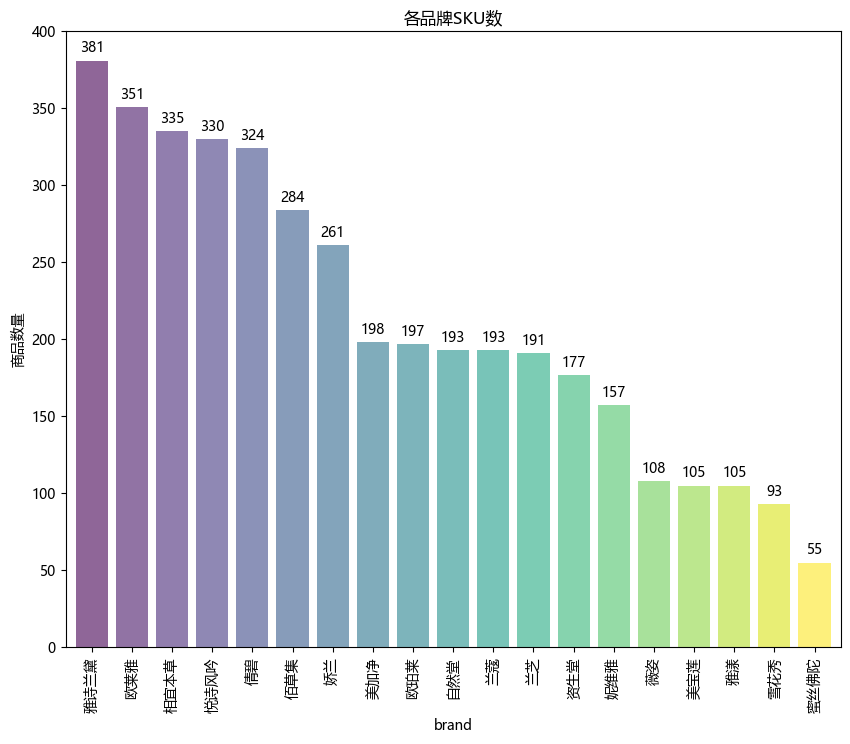

In [9]:
fig = plt.figure(figsize = (10,8))
# 创建一个新的图形，设置图形的大小为宽 10 单位、高 8 单位
ax  = plt.gca()
# 获取当前轴对象
sku_brand.plot(kind = 'bar', width = 0.8, alpha = 0.6,color = colors,ax = ax)
# 假设 sku_brand 是一个 pandas 的 Series 或 DataFrame，使用 plot 方法绘制柱状图
# kind='bar' 表示绘制柱状图
# width=0.8 表示柱状图的宽度为 0.8
# alpha=0.6 表示柱状图的透明度为 0.6
# color=colors 表示柱状图的颜色，这里 colors 应该是一个颜色列表
# ax=ax 表示将图形绘制在之前获取的轴对象 ax 上
plt.title('各品牌SKU数',fontsize = 12)
# 设置图形的标题，字体大小为 12
plt.ylabel('商品数量',fontsize = 10)
# 设置 y 轴的标签，字体大小为 10

#添加数据标签
#ax.patches 包含了柱状图的每个条
for p in ax.patches:
    # 获取当前条的高度
    height = p.get_height() 
    # 使用 ax.annotate 方法添加注释
    # 标注的内容是条的高度，使用 format 函数将高度转换为字符串
    # xy 是标注的位置，为条的中心位置，x 坐标为条的起始位置加上条宽的一半，y 坐标为条的高度
    # xytext 是文本的偏移量，这里是相对于 xy 位置向上偏移 3 个点
    # textcoords='offset points' 表示 xytext 的坐标单位是点
    # ha='center' 表示水平对齐方式为居中
    # va='bottom' 表示垂直对齐方式为底部
    ax.annotate(
        '{}'.format(height),#标注内容为条高度
        xy = (p.get_x()+ p.get_width()/2, height),
        xytext = (0,3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )
plt.show()
# 显示图形

### 2.1.2 销量、销售额分析

In [10]:
brand_salecnt = data.groupby('brand')['sale_count'].agg(sum).sort_values(ascending = True)
brand_salecnt

brand_sale_money = data.groupby('brand')['sale_money'].agg(sum).sort_values(ascending = True)
brand_sale_money

# 保存分析结果
brand_salecnt.to_csv('./各品牌总销量.csv')
brand_sale_money.to_csv('./各品牌总销售额.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1745313189.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brand_salecnt = data.groupby('brand')['sale_count'].agg(sum).sort_values(ascending = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1745313189.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brand_sale_money = data.groupby('brand')['sale_money'].agg(sum).sort_values(ascending = True)


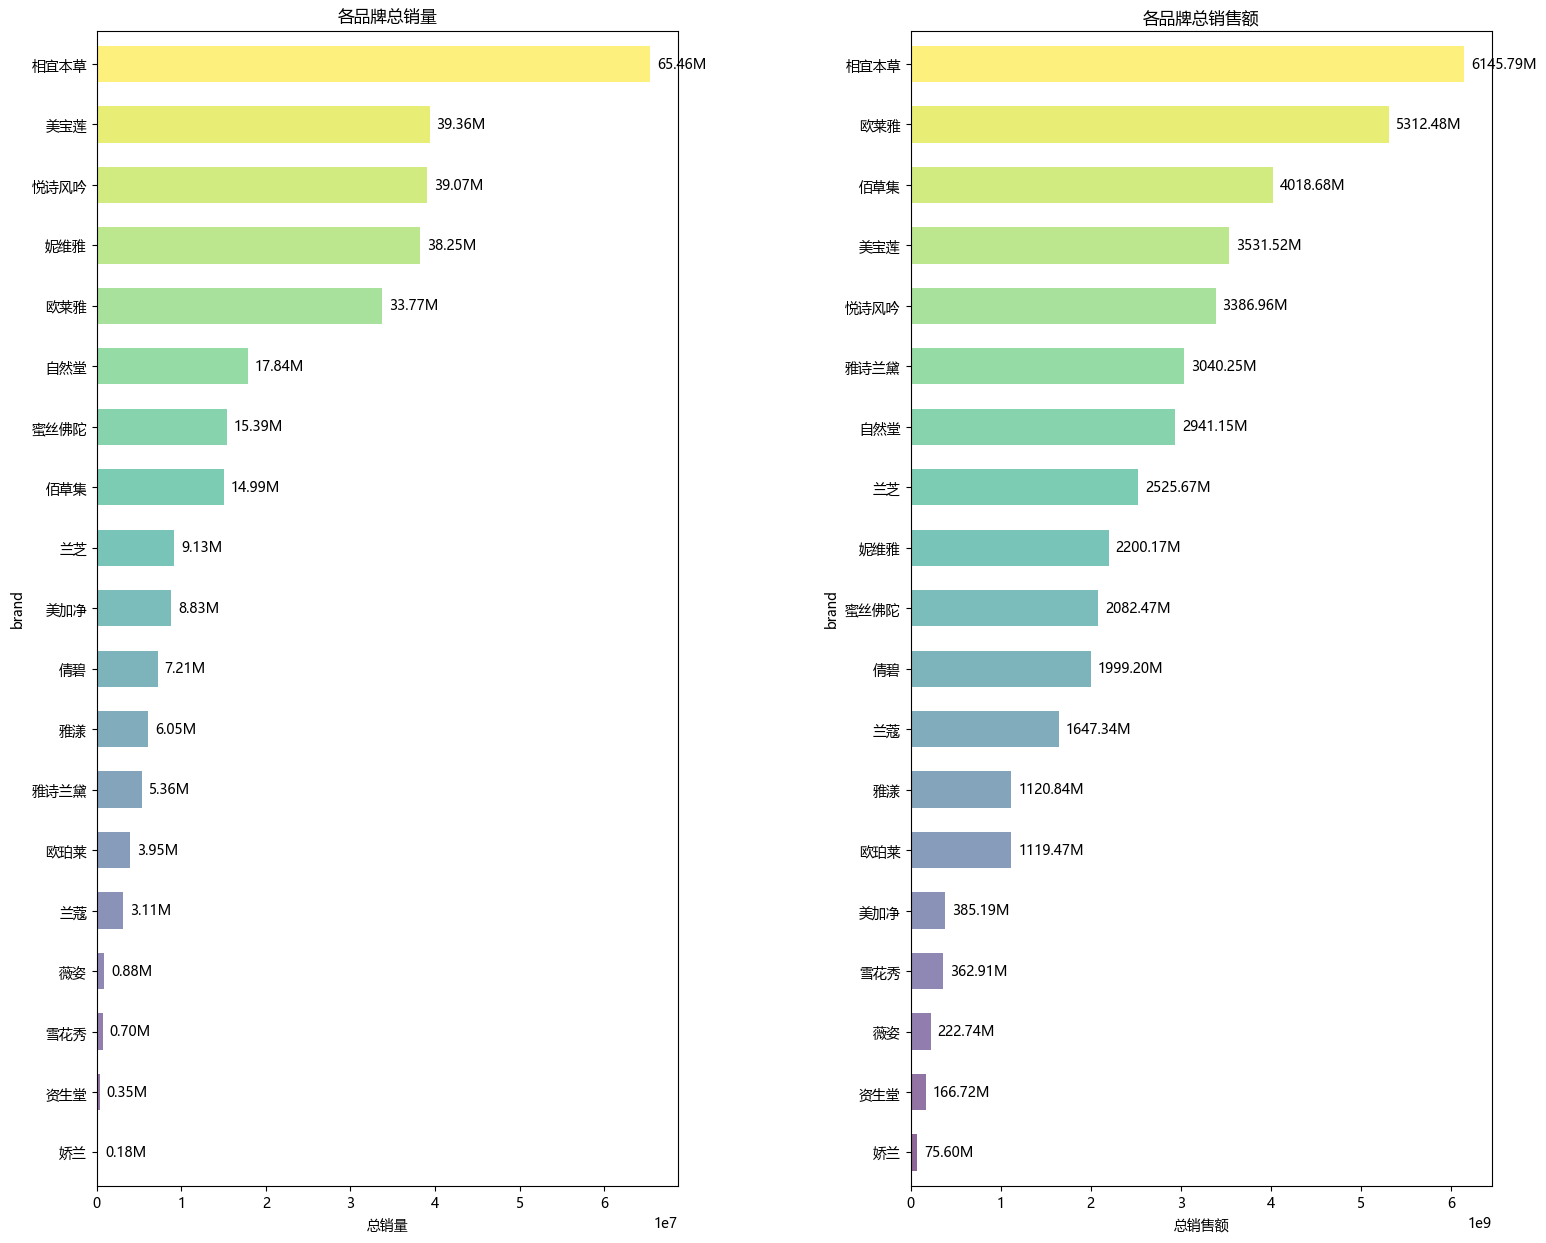

In [11]:
#可视化
# 使用 plt.subplots 函数创建一个包含 1 行 2 列的子图布局，设置图形的总大小为宽 18 单位、高 12 单位
# fig 是整个图形对象，axes 是一个包含两个轴对象的数组
fig,axes = plt.subplots(1,2,figsize = (18,15))

# 假设 brand_salecnt 是一个 pandas 的 Series 或 DataFrame，使用 plot 方法绘制水平柱状图
# ax=axes[0] 表示将图形绘制在第一个轴对象上
# kind='barh' 表示绘制水平柱状图
# width=0.6 表示柱状图的宽度为 0.6
# alpha=0.6 表示柱状图的透明度为 0.6
# color=colors 表示使用 colors 函数生成的颜色列表作为柱状图的颜色
brand_salecnt.plot(kind = 'barh', ax = axes[0], width = 0.6,alpha = 0.6,color = colors)
# 为第一个轴对象设置标题，字体大小为 12
axes[0].set_title('各品牌总销量',fontsize = 12)
# 为第一个轴对象设置 x 轴标签，字体大小为 10
axes[0].set_xlabel('总销量',fontsize = 10)
for p in axes[0].patches:
    # 获取当前条的宽度（对于水平柱状图，宽度表示数据的值）
    width = p.get_width()
    # 将数据标签的格式以百万为单位显示，使用 '{:.2f}M' 格式化字符串
    label = '{:.2f}M'.format(width / 1e6)
    # 使用 annotate 方法添加数据标签
    # 标注的内容是格式化后的标签
    # xy 是标注的位置，为条的右侧中心位置，x 坐标为条的宽度，y 坐标为条的垂直中心位置
    # xytext 是文本的偏移量，这里是相对于 xy 位置向右偏移 5 个点
    # textcoords='offset points' 表示 xytext 的坐标单位是点
    # ha='left' 表示水平对齐方式为左对齐
    # va='center' 表示垂直对齐方式为居中
    axes[0].annotate(
        label,
        xy=(width, p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center'
    )


brand_sale_money.plot(kind = 'barh', ax = axes[1], width = 0.6,alpha = 0.6, color = colors)
axes[1].set_title('各品牌总销售额',fontsize = 12)
axes[1].set_xlabel('总销售额',fontsize = 10)
for p in axes[1].patches:
    width = p.get_width()
    # 将数据标签的格式以百万为单位显示，使用 '{:.2f}M' 格式化字符串
    label = '{:.2f}M'.format(width / 1e6)
    axes[1].annotate(
        label,
        xy=(width, p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center'
    )

# 调整子图之间的水平间距为 0.4    
plt.subplots_adjust(wspace = 0.4)
# 显示图形
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1162476735.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brand_salecnt1 = data.groupby('brand')['sale_count'].agg(sum).sort_values(ascending = False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1162476735.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brand_sale_money1 = data.groupby('brand')['sale_money'].agg(sum).sort_values(ascending = False)


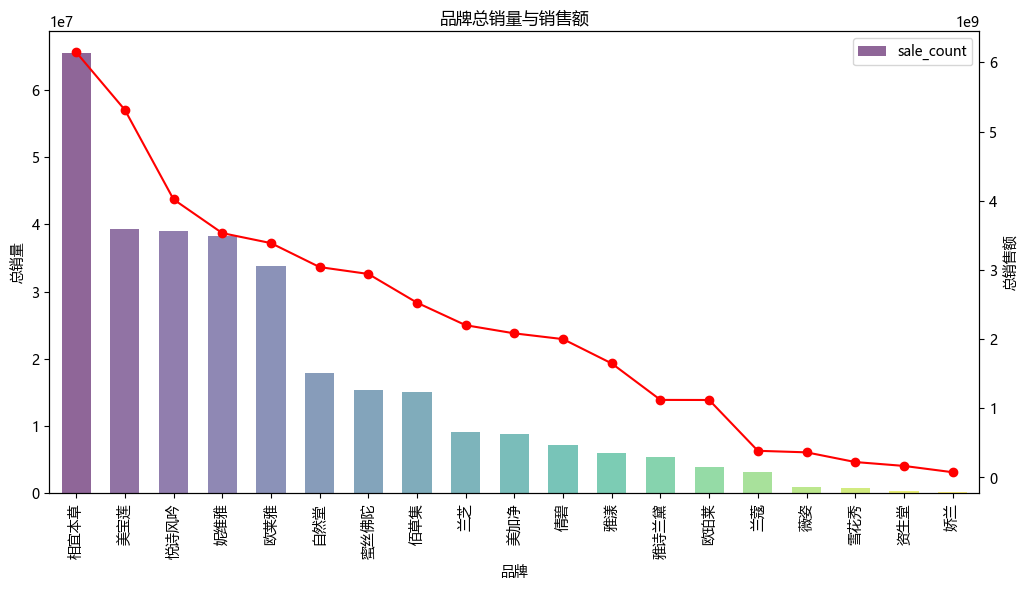

In [12]:
brand_salecnt1 = data.groupby('brand')['sale_count'].agg(sum).sort_values(ascending = False)
brand_sale_money1 = data.groupby('brand')['sale_money'].agg(sum).sort_values(ascending = False)

fig,ax1 = plt.subplots(1,1,figsize = (12,6))

brand_salecnt1.plot(kind = 'bar',ax = ax1,width = 0.6,alpha = 0.6, color = colors)
# 使用 brand_salecnt1 的 plot 方法绘制柱状图，ax=ax1 表示将图形绘制在 ax1 轴对象上
# kind='bar' 表示绘制垂直柱状图
# width=0.6 表示柱状图的宽度为 0.6
# alpha=0.6 表示柱状图的透明度为 0.6
# color=colors表示使用 get_colors 函数生成的颜色列表作为柱状图的颜色

# 设置图形的标题和 x 轴、y 轴标签
ax1.set_title('品牌总销量与销售额',fontsize = 12)
ax1.set_xlabel('品牌',fontsize = 10)
ax1.set_ylabel('总销量',fontsize = 10)
# 为柱状图添加数值标签（以百万为单位）
'''for p in ax1.patches:
    # 获取柱状图条的高度
    height = p.get_height()
    # 将数值转换为百万并保留两位小数
    label = '{:.2f}M'.format(height / 1e6)
    # 使用 annotate 方法添加注释，内容为以百万为单位的标签
    ax1.annotate(label,
                # 注释的位置为条的顶部中心
                xy=(p.get_x() + p.get_width() / 2, height),
                # 注释文本的偏移量
                xytext=(-3, -3),
                textcoords='offset points',
                # 水平对齐方式为居中
                ha='center',
                # 垂直对齐方式为底部
                va='bottom')'''


# 创建一个与 ax1 共享 x 轴的第二个轴对象 ax2
ax2 = ax1.twinx()
ax2.plot(brand_sale_money1.index,brand_sale_money1.values,marker = 'o',color = 'red', linestyle = '-')
'''for i, value in enumerate(brand_sale_money1.values):
    # 将数值转换为百万并保留两位小数
    label = '{:.2f}M'.format(value / 1e6)
    # 使用 annotate 方法添加注释，内容为以百万为单位的标签
    ax2.annotate(label,
                # 注释的位置为数据点的位置
                xy=(i, value),
                # 注释文本的偏移量
                xytext=(5, 6),
                textcoords='offset points',
                # 水平对齐方式为居中
                ha='center',
                # 垂直对齐方式为底部
                va='bottom')'''

# 在 ax2 上绘制品牌总销售额的折线图
ax2.set_ylabel('总销售额',fontsize = 10)
# 使用 ax2.plot 方法绘制折线图
# brand_sale_money1.index 是 x 轴数据
# brand_sale_money1.values 是 y 轴数据
# marker='o' 表示使用圆形标记点
# color='red' 表示折线的颜色为红色
# linestyle='-' 表示使用实线

# 设置图例
handles1,labels1 = ax1.get_legend_handles_labels()
handles2,labels2 = ax2.get_legend_handles_labels()
# 将 ax1 和 ax2 的图例句柄和标签合并，并将图例放置在右上角
ax1.legend(handles1+handles2,labels1 + labels2, loc = 'upper right')
# 将 x 轴刻度标签旋转 45 度
plt.xticks(rotation = 45)
plt.show()

## 2.2 各类别数据分析

### 2.2.1 主类别分析

In [13]:
mt_salecnt = data.groupby('main_type')['sale_count'].agg(sum).sort_values(ascending = True)
mt_salemon = data.groupby('main_type')['sale_money'].agg(sum).sort_values(ascending = True)
mt_salecnt
mt_salemon

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\912604163.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mt_salecnt = data.groupby('main_type')['sale_count'].agg(sum).sort_values(ascending = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\912604163.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mt_salemon = data.groupby('main_type')['sale_money'].agg(sum).sort_values(ascending = True)


main_type
化妆品    6.807963e+09
其他     7.477489e+09
护肤品    2.799969e+10
Name: sale_money, dtype: float64

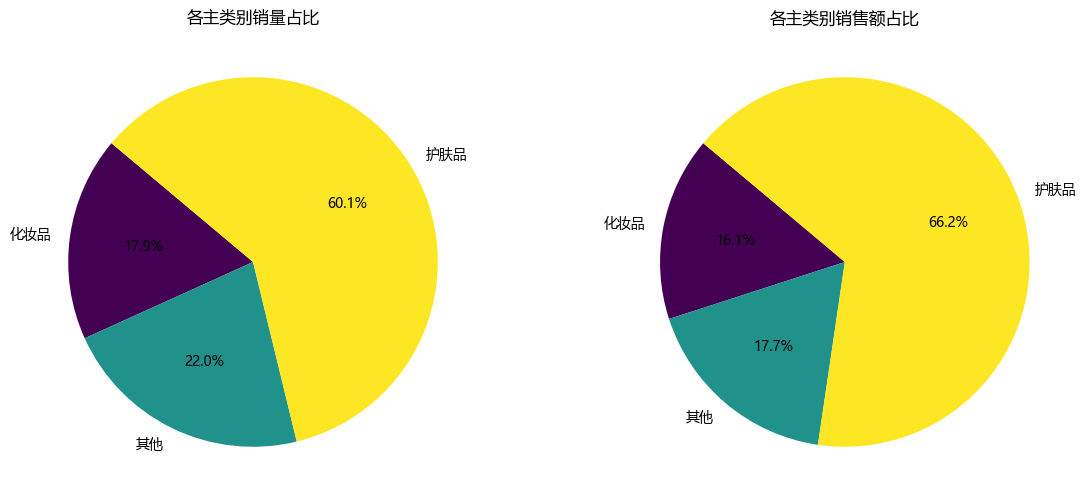

In [14]:
#可视化
# 创建一个新的图形，设置图形的大小为宽 14 单位、高 6 单位
plt.figure(figsize = (14,6))
# 创建一个 1 行 2 列的子图布局，并选择第一个子图
plt.subplot(1,2,1)
# 使用 plt.pie 函数绘制第一个饼图
plt.pie(mt_salecnt,labels = mt_salecnt.index,autopct = '%1.1f%%', startangle = 140,colors = get_colors(mt_salecnt))
# 为第一个子图设置标题，字体大小为 12
plt.title('各主类别销量占比',fontsize = 12)
# 选择第二个子图
plt.subplot(1,2,2)
# 使用 plt.pie 函数绘制第二个饼图
plt.pie(mt_salemon,labels = mt_salemon.index,autopct = '%1.1f%%', startangle = 140, colors = get_colors(mt_salemon))
# 为第二个子图设置标题，字体大小为 12
plt.title('各主类别销售额占比',fontsize = 12)

plt.show()

### 2.2.2 子类别分析


In [15]:
st_salecnt = data.groupby('sub_type')['sale_count'].agg(sum).sort_values(ascending = True)
st_salemon = data.groupby('sub_type')['sale_money'].agg(sum).sort_values(ascending = True)
st_salecnt
st_salemon

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1781701016.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  st_salecnt = data.groupby('sub_type')['sale_count'].agg(sum).sort_values(ascending = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1781701016.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  st_salemon = data.groupby('sub_type')['sale_money'].agg(sum).sort_values(ascending = True)


sub_type
修容类     1.820329e+08
防晒类     6.793584e+08
精华类     7.443871e+08
口红类     1.332544e+09
眼部彩妆    1.359625e+09
乳液类     1.558125e+09
眼部护理    1.634224e+09
化妆水     2.030941e+09
面霜类     2.326053e+09
面膜类     2.495942e+09
清洁类     3.731897e+09
底妆类     3.933761e+09
其他      7.477489e+09
套装      1.279876e+10
Name: sale_money, dtype: float64

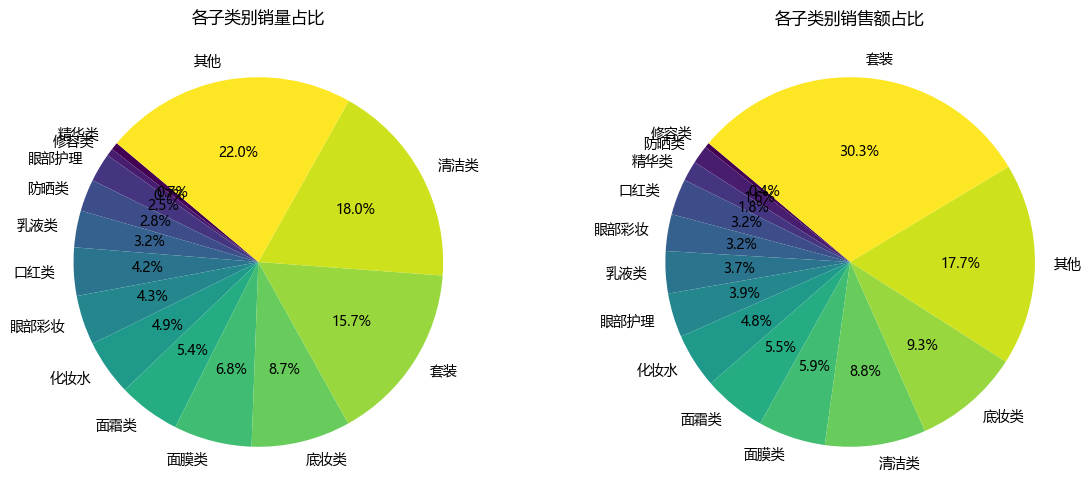

In [16]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(st_salecnt, labels = st_salecnt.index,autopct = '%1.1f%%', startangle = 140, colors = get_colors(st_salecnt))
plt.title('各子类别销量占比',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(st_salemon, labels = st_salemon.index,autopct = '%1.1f%%', startangle = 140, colors = get_colors(st_salemon))
plt.title('各子类别销售额占比',fontsize = 12)

plt.show()

## 2.3 各品牌+各类别分析

### 2.3.1 各品牌+主类别

In [17]:
brandmt_data = data.groupby(['brand','main_type'])[['sale_count','sale_money']].agg(sum).reset_index()
brandmt_data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\2894945104.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brandmt_data = data.groupby(['brand','main_type'])[['sale_count','sale_money']].agg(sum).reset_index()


,brand,main_type,sale_count,sale_money
0,佰草集,其他,1978043.0,4.387021e+08
1,佰草集,化妆品,143224.0,2.702700e+07
2,佰草集,护肤品,12873197.0,3.552950e+09
3,倩碧,其他,1156792.0,2.965881e+08
4,倩碧,化妆品,608379.0,1.190764e+08


In [18]:
brands = brandmt_data['brand'].unique()
brands
main_types = brandmt_data['main_type'].unique()
main_types

array(['其他', '化妆品', '护肤品'], dtype=object)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1735876995.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'brand',y = 'sale_count', data = type_data, ax = ax, ci = None, alpha = 0.6, palette = 'viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1735876995.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'brand',y = 'sale_count', data = type_data, ax = ax, ci = None, alpha = 0.6, palette = 'viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1735876995.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'brand', y = 'sale_money', data = type_data, ax = ax2, ci = None, color = 'red', marker = 'o', linestyle = '-')
C:\Users\Administrator\AppData\Local\Tem

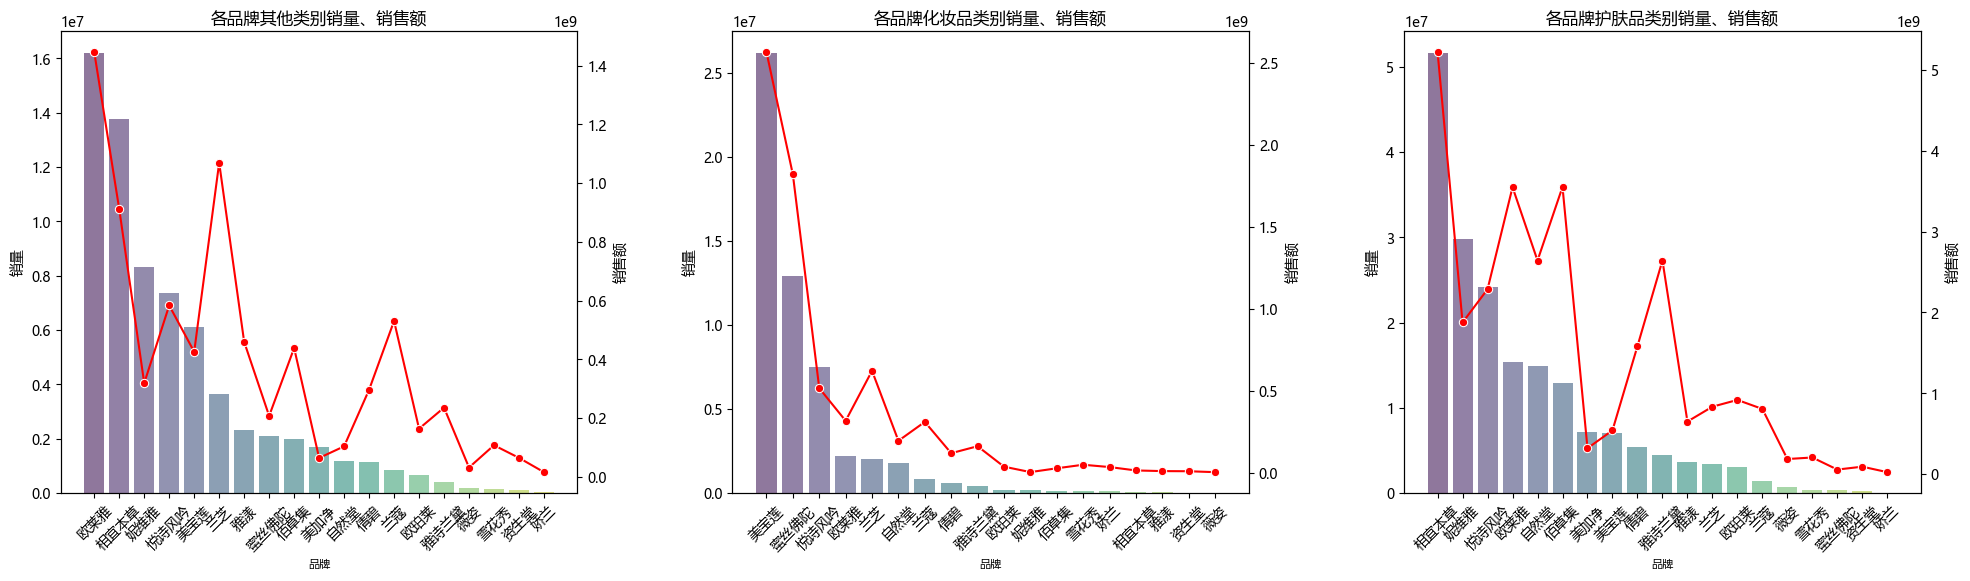

In [19]:
# 获取唯一主类别
main_types = brandmt_data['main_type'].unique()
brands = brandmt_data['brand'].unique()
# 使用 plt.subplots 创建一个 1 行 3 列的子图布局，设置图形的大小为宽 24 单位、高 6 单位，不共享 y 轴
fig,axes = plt.subplots(nrows = 1, ncols = 3,figsize = (24,6),sharey = False)

#遍历主类别，为每个主类别绘图
for ax, main_type in zip(axes, main_types):
    #过滤当前主类别数据
     # brandmt_data[brandmt_data['main_type'] == main_type] 筛选出 main_type 等于当前 main_type 的数据
    type_data = brandmt_data[brandmt_data['main_type']== main_type]
    # 按照 sale_count 对数据进行降序排序
    type_data = type_data.sort_values(by ='sale_count',ascending = False)
    # 使用 seaborn 的 barplot 绘制柱状图
    # x='brand' 表示 x 轴使用 brand 列的数据
    # y='sale_count' 表示 y 轴使用 sale_count 列的数据
    # ax=ax 表示将图形绘制在当前的轴对象 ax 上
    # ci=None 表示不显示置信区间
    # alpha=0.6 表示柱状图的透明度为 0.6
    # palette='viridis' 表示使用 viridis 颜色映射
    sns.barplot(x = 'brand',y = 'sale_count', data = type_data, ax = ax, ci = None, alpha = 0.6, palette = 'viridis')
    # 创建一个与 ax 共享 x 轴的第二个轴对象 ax2
    ax2 = ax.twinx()
    # 使用 seaborn 的 lineplot 绘制折线图
    # x='brand' 表示 x 轴使用 brand 列的数据
    # y='sale_money' 表示 y 轴使用 sale_money 列的数据
    # ax=ax2 表示将图形绘制在 ax2 上
    # ci=None 表示不显示置信区间
    # color='red' 表示折线图的颜色为红色
    # marker='o' 表示使用圆形标记点
    # linestyle='-' 表示使用实线
    sns.lineplot(x = 'brand', y = 'sale_money', data = type_data, ax = ax2, ci = None, color = 'red', marker = 'o', linestyle = '-')

    #折线图标签
    '''for i,(x,y) in enumerate(zip(type_data['brand'],type_data['sale_money'])):
        # 在每个数据点的位置添加文本标签
        # x=i 表示 x 轴位置为数据点的索引
        # y=y 表示 y 轴位置为数据点的 y 值
        # s=f'{y:.2f}' 表示标签的内容为 y 值保留两位小数
        # ha='right' 表示水平对齐方式为右对齐
        # va='bottom' 表示垂直对齐方式为底部对齐
        # fontsize=8 表示字体大小为 8
        # color='red' 表示字体颜色为红色
      
         ax2.text(x=i, y=y, s=f'{y:.2f}', ha='right', va='bottom', fontsize=8, color='red')'''
    # 设置 x 轴刻度标签的旋转角度为 45 度
    ax.tick_params(axis= 'x',rotation = 45)
    #设置图例
    #设置子图的标题
    ax.set_title(f'各品牌{main_type}类别销量、销售额',fontsize = 12)
    # 设置 x 轴的标签
    ax.set_xlabel('品牌',fontsize = 8)
    # 设置第一个 y 轴（柱状图）的标签
    ax.set_ylabel('销量',fontsize = 10)
    # 设置第二个 y 轴（折线图）的标签
    ax2.set_ylabel('销售额',fontsize = 10)
# 调整子图之间的水平间距为 0.3
plt.subplots_adjust(wspace = 0.3)
plt.show()

In [20]:
brandmt_data

,brand,main_type,sale_count,sale_money
0,佰草集,其他,1978043.0,4.387021e+08
1,佰草集,化妆品,143224.0,2.702700e+07
2,佰草集,护肤品,12873197.0,3.552950e+09
3,倩碧,其他,1156792.0,2.965881e+08
4,倩碧,化妆品,608379.0,1.190764e+08
5,倩碧,护肤品,5449389.0,1.583535e+09
6,兰芝,其他,3641916.0,1.069604e+09
7,兰芝,化妆品,2045107.0,6.213219e+08
8,兰芝,护肤品,3443221.0,8.347396e+08
9,兰蔻,其他,846581.0,5.306665e+08


In [21]:
brands
#print(len(brand_data))

array(['佰草集', '倩碧', '兰芝', '兰蔻', '妮维雅', '娇兰', '悦诗风吟', '欧珀莱', '欧莱雅', '相宜本草',
       '美加净', '美宝莲', '自然堂', '薇姿', '蜜丝佛陀', '资生堂', '雅漾', '雅诗兰黛', '雪花秀'],
      dtype=object)

In [22]:
#bottoms = np.zeros(len(brand_data))
#bottoms

In [23]:
for idx,brand in enumerate(brands):
    # 筛选出品牌等于当前品牌的数据，并重置索引
    brand_data = brandmt_data[brandmt_data['brand']== brand].reset_index()
    # 按照 main_type 对数据进行排序
    brand_data = brand_data.sort_values(by = 'main_type')
    # 用于存储每个堆叠柱状图的底部位置
    bottoms = np.zeros(len(brand_data))
    print(brand_data)
    #print(bottoms)
    for i,row in brand_data.iterrows():
        print(row)


   index brand main_type  sale_count    sale_money
0      0   佰草集        其他   1978043.0  4.387021e+08
1      1   佰草集       化妆品    143224.0  2.702700e+07
2      2   佰草集       护肤品  12873197.0  3.552950e+09
index                   0
brand                 佰草集
main_type              其他
sale_count      1978043.0
sale_money    438702070.8
Name: 0, dtype: object
index                  1
brand                佰草集
main_type            化妆品
sale_count      143224.0
sale_money    27027002.0
Name: 1, dtype: object
index                    2
brand                  佰草集
main_type              护肤品
sale_count      12873197.0
sale_money    3552950277.0
Name: 2, dtype: object
   index brand main_type  sale_count    sale_money
0      3    倩碧        其他   1156792.0  2.965881e+08
1      4    倩碧       化妆品    608379.0  1.190764e+08
2      5    倩碧       护肤品   5449389.0  1.583535e+09
index                   3
brand                  倩碧
main_type              其他
sale_count      1156792.0
sale_money    296588075.0
Nam

In [24]:
x_positions = np.arange(len(brands))
x_positions

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

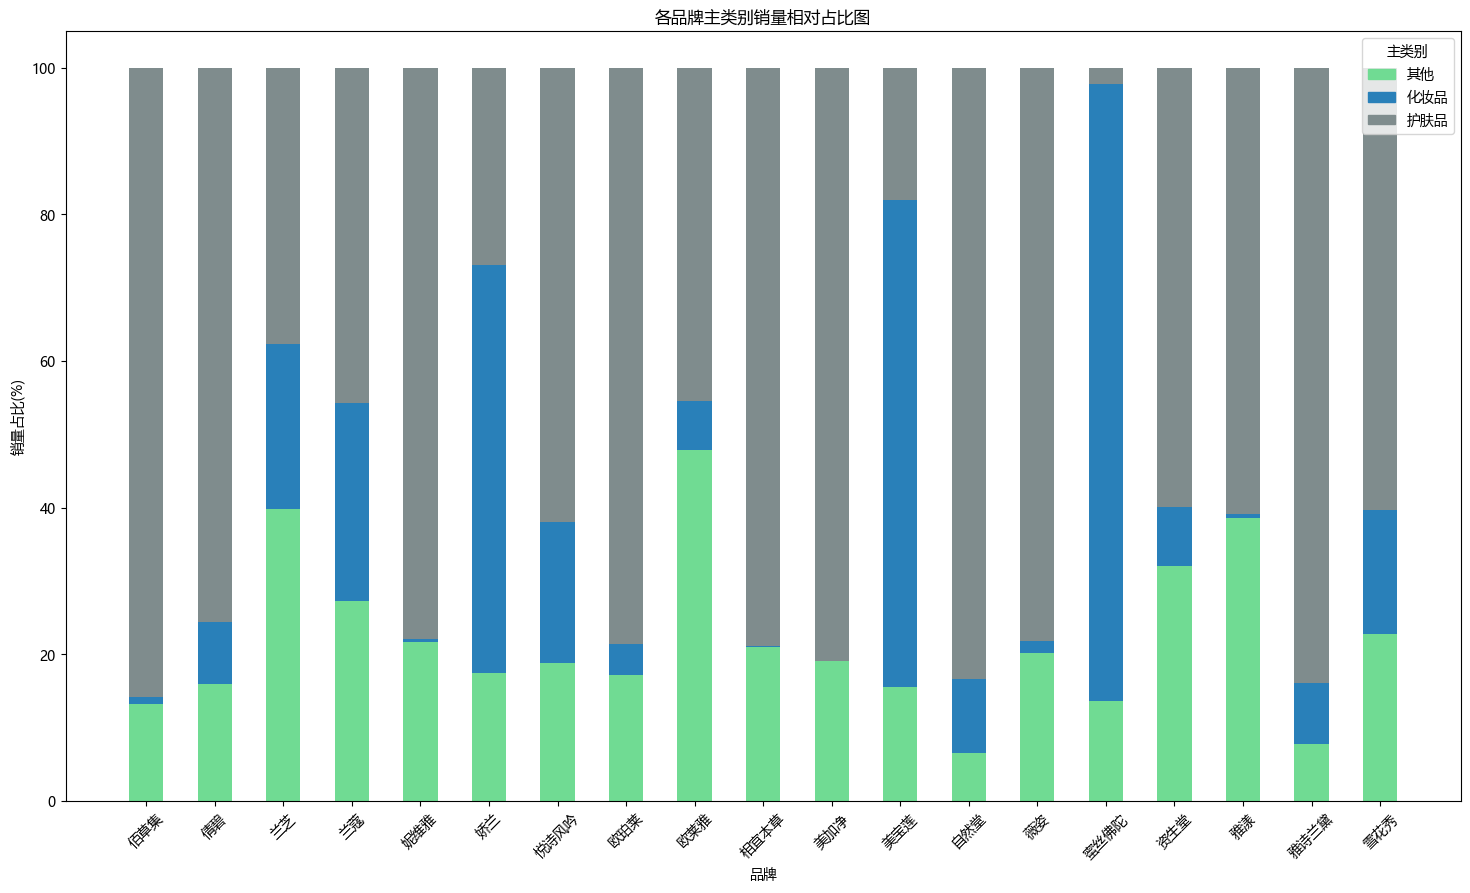

In [25]:
'''transform('sum') 对分组后的每个组内的 sale_money 列进行求和操作，
并将结果广播到原 DataFrame 中的每一行。也就是说，
对于每个组，计算 sale_money 的总和，
然后将这个总和赋值给该组内每一行的新列 money_total。'''
brandmt_data['count_total'] = brandmt_data.groupby('brand')['sale_count'].transform('sum')
brandmt_data['money_total'] = brandmt_data.groupby('brand')['sale_money'].transform('sum')

#计算各品牌内部主类别相对占比,axis = 1 按行操作，axis = 0 按列操作 
brandmt_data['count_percent'] = brandmt_data.apply(lambda row: row['sale_count']/row['count_total']*100 if row['count_total'] != 0 else 0, axis = 1)
brandmt_data['money_percent'] = brandmt_data.apply(lambda row: row['sale_money']/row['money_total']*100 if row['money_total'] != 0 else 0, axis = 1)
#brandmt_data
#颜色映射定义
maincolor_map = {
    '其他':'#70DB93',
    '化妆品':'#2980B9',
    '护肤品':'#7F8C8D'
}

#品牌相对主类别数据占比可视化
plt.figure(figsize = (18,10))
# 创建一个与品牌数量相同长度的数组，用于表示 x 轴的位置
x_positions = np.arange(len(brands))
# 柱状图的宽度
bar_width = 0.5

# 遍历品牌
for idx,brand in enumerate(brands):
    # 筛选出品牌等于当前品牌的数据，并重置索引
    brand_data = brandmt_data[brandmt_data['brand']== brand].reset_index()
    # 按照 main_type 对数据进行排序
    brand_data = brand_data.sort_values(by = 'main_type')
    # 用于存储每个堆叠柱状图的底部位置
    bottoms = np.zeros(len(brand_data))
    
    # 遍历品牌数据的每一行
    for i,row in brand_data.iterrows():
        # 绘制堆叠柱状图
        # x_positions[idx] 表示当前品牌的 x 轴位置
        # row['count_percent'] 表示当前行的 count_percent 列的值，即柱状图的高度
        # width=bar_width 表示柱状图的宽度
        # bottom=bottoms[i] 表示当前柱状图的底部位置
        # color=maincolor_map.get(row['main_type'], 'black') 根据 main_type 从 maincolor_map 中获取颜色，如果不存在则使用黑色
        plt.bar(x_positions[idx],row['count_percent'],width = bar_width , bottom = bottoms[i],color = maincolor_map.get(row['main_type'],'black'))
        # 更新 bottoms 数组，用于下一个柱状图的底部位置
        bottoms[i+1:] += row['count_percent']

# 设置 x 轴刻度标签，使用品牌名称，并将标签旋转 45 度
plt.xticks(x_positions,brands, rotation = 45)
# 创建图例的手柄和标签
handles = [plt.Rectangle((0,0),1,1,color = maincolor_map[main_type]) for main_type in maincolor_map.keys()]
labels = maincolor_map.keys()

# 添加图例
plt.legend(handles, labels, title = '主类别')

# 设置标题和轴标签
plt.title('各品牌主类别销量相对占比图',fontsize = 12)
plt.xlabel('品牌',fontsize = 10)
plt.ylabel('销量占比(%)')
plt.show()

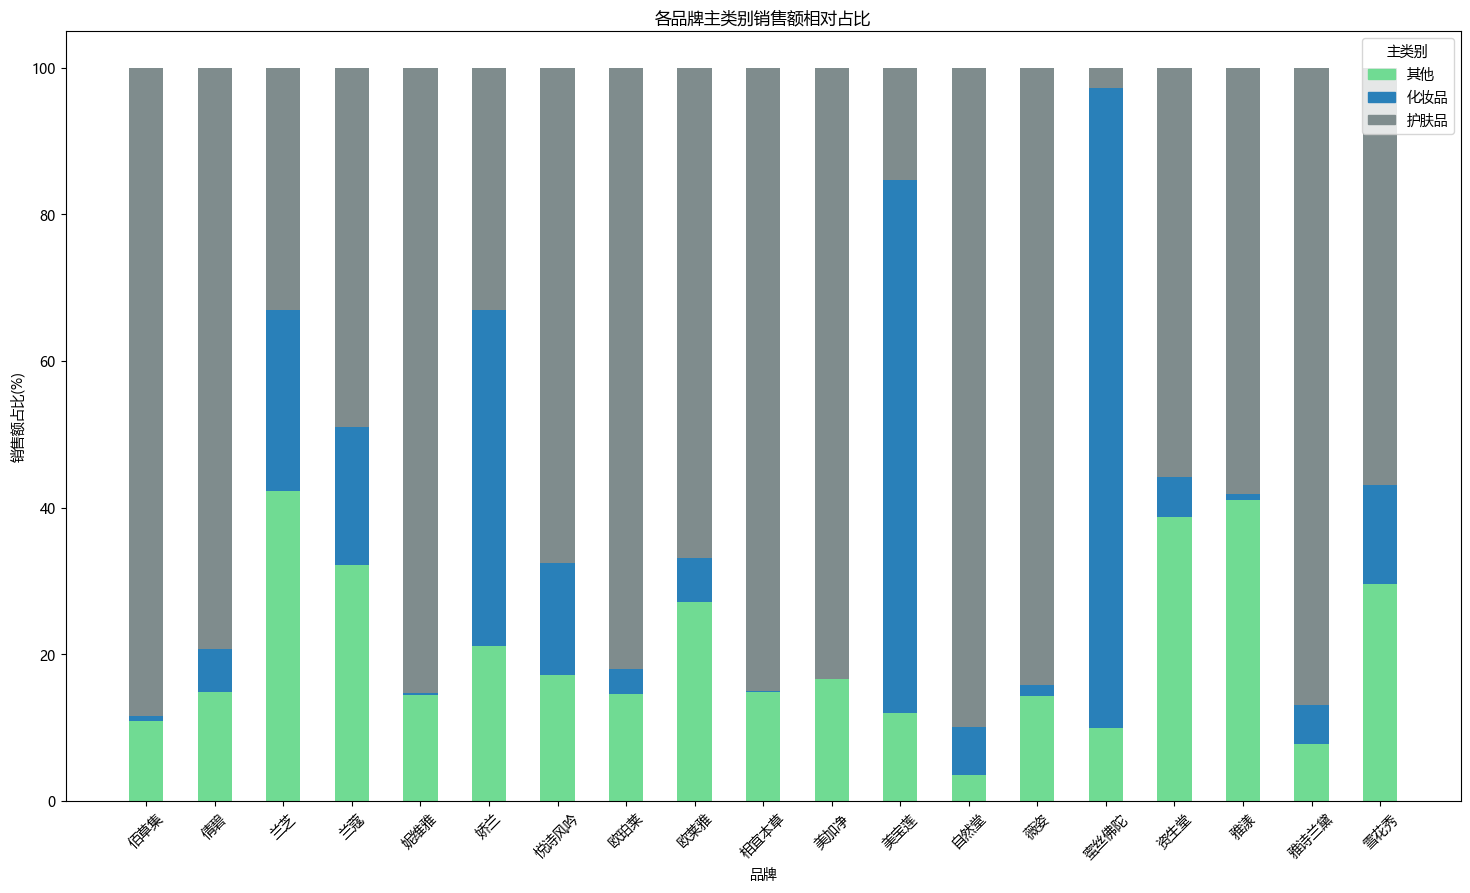

In [26]:
# 各品牌主类别销售额相对占比
plt.figure(figsize = (18,10))

for idx,brand in enumerate(brands):
    brand_data = brandmt_data[brandmt_data['brand']==brand].reset_index()
    brand_data = brand_data.sort_values(by = 'main_type')
    bottoms = np.zeros(len(brand_data))

    for i,row in brand_data.iterrows():
        plt.bar(x_positions[idx],row['money_percent'],width = bar_width, bottom = bottoms[i],color = maincolor_map.get(row['main_type'],'black'))
        bottoms[i+1:] += row['money_percent']
plt.xticks(x_positions,brands, rotation = 45)

handles = [plt.Rectangle((0,0),1,1,color = maincolor_map[main_type]) for main_type in maincolor_map.keys()]
labels = maincolor_map.keys()
plt.legend(handles,labels, title = '主类别')

plt.title('各品牌主类别销售额相对占比',fontsize = 12)
plt.xlabel('品牌',fontsize = 10)
plt.ylabel('销售额占比(%)',fontsize = 10)
plt.show()

### 2.3.2 各品牌+子类别

In [27]:
brandst_data = data.groupby(['brand','sub_type'])[['sale_count','sale_money']].agg(sum).reset_index()
brandst_data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\680398544.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brandst_data = data.groupby(['brand','sub_type'])[['sale_count','sale_money']].agg(sum).reset_index()


,brand,sub_type,sale_count,sale_money
0,佰草集,乳液类,907026.0,1.864368e+08
1,佰草集,修容类,14870.0,1.618252e+06
2,佰草集,其他,1978043.0,4.387021e+08
3,佰草集,化妆水,1345631.0,2.321118e+08
4,佰草集,套装,3184473.0,1.431921e+09


In [28]:
sub_types = brandst_data['sub_type'].unique()
brands = brandst_data['brand'].unique()
sub_types

array(['乳液类', '修容类', '其他', '化妆水', '套装', '底妆类', '清洁类', '眼部彩妆', '眼部护理',
       '精华类', '面膜类', '面霜类', '口红类', '防晒类'], dtype=object)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\585711207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\585711207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\585711207.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='brand',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\585711207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\585711207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is 

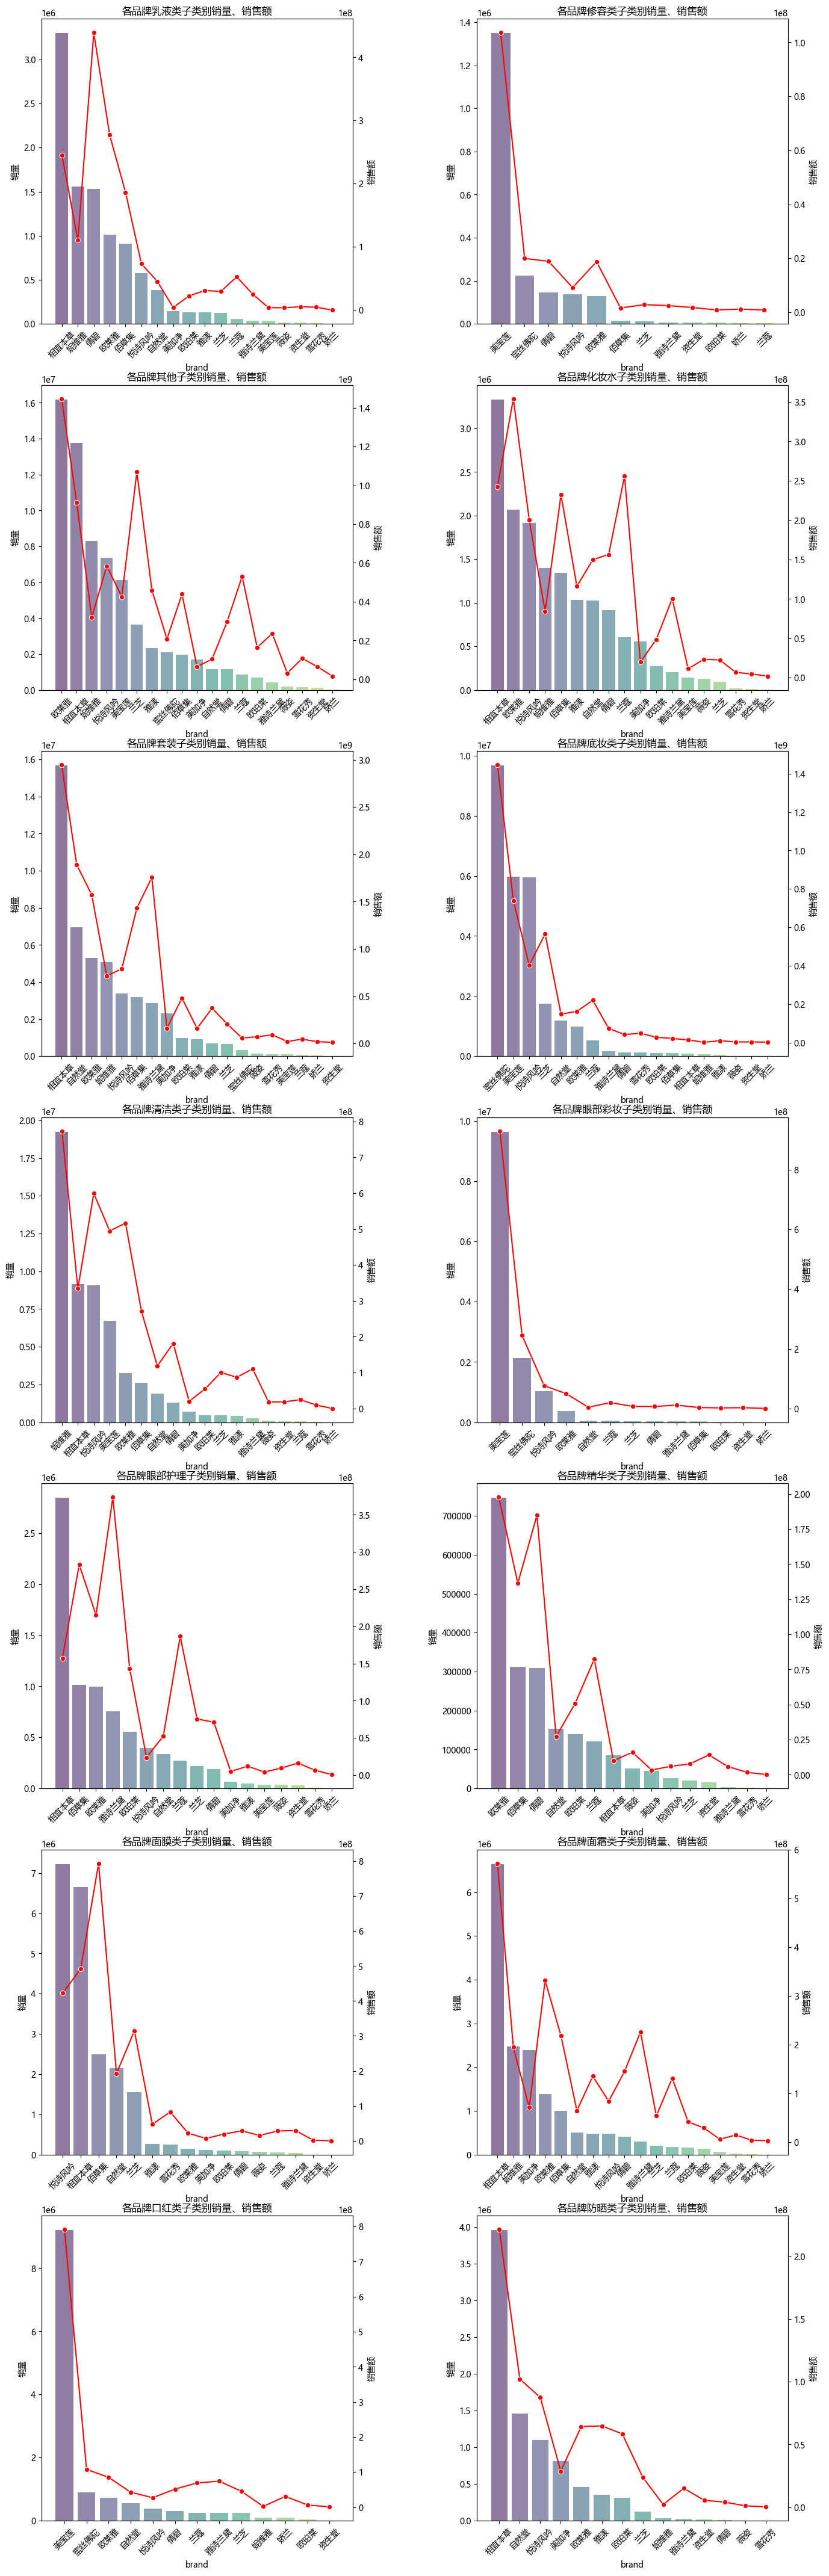

In [29]:
# 创建一个 7 行 2 列的子图布局，设置图形大小为宽 16 单位、高 54 单位
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 54))

#遍历子类别，并绘图
#axes.flat，将二维数组展平为一维数组
# 遍历子类别，并绘图
for ax, sub_type in zip(axes.flat, sub_types):
    # 筛选出当前子类别数据并排序
    type_data = brandst_data[brandst_data['sub_type'] == sub_type]
    type_data = type_data.sort_values(by='sale_count', ascending=False)
     # 使用 seaborn 的 barplot 绘制柱状图
    sns.barplot(x='brand',
                y='sale_count',
                data=type_data,
                ax=ax,
                ci=None,
                alpha=0.6,
                palette='viridis')
     # 创建与 ax 共享 x 轴的 ax2 轴对象
    ax2 = ax.twinx()
    sns.lineplot(x='brand',
                 y='sale_money',
                 data=type_data,
                 ax=ax2,
                 ci=None,
                 color='red',
                 marker='o',
                 linestyle='-')
    # 以下是添加折线图数据标签的代码，目前处于注释状态
    #for i, (brand, sale_money) in enumerate(
            #zip(type_data['brand'], type_data['sale_money'])):
        #ax2.text(i,
                # sale_money,
                # f'{sale_money:.2f}',
                # ha='right',
                # va='bottom',
                # fontsize=8,
                # color='red')
     # 设置 x 轴刻度标签旋转角度
    ax.tick_params(axis='x', rotation=45)
    # 设置子图标题
    ax.set_title(f'各品牌{sub_type}子类别销量、销售额', fontsize=12)
    # 设置左侧 y 轴（柱状图）的标签
    ax.set_ylabel('销量', fontsize=10)
    # 设置右侧 y 轴（折线图）的 label
    ax2.set_ylabel('销售额', fontsize=10)
# 调整子图之间的水平间距
plt.subplots_adjust(wspace=0.4)
plt.show()

In [30]:
brandst_data.head(5)

,brand,sub_type,sale_count,sale_money
0,佰草集,乳液类,907026.0,1.864368e+08
1,佰草集,修容类,14870.0,1.618252e+06
2,佰草集,其他,1978043.0,4.387021e+08
3,佰草集,化妆水,1345631.0,2.321118e+08
4,佰草集,套装,3184473.0,1.431921e+09


In [31]:
brandst_data['count_total'] = brandst_data.groupby('brand')['sale_count'].transform('sum')
brandst_data['money_total'] = brandst_data.groupby('brand')['sale_money'].transform('sum')

brandst_data['count_percent'] = brandst_data.apply(lambda row: row['sale_count']/row['count_total']*100 if row['count_total'] != 0 else 0, axis = 1)
brandst_data['money_percent'] = brandst_data.apply(lambda row: row['sale_money']/row['money_total']*100 if row['money_total'] != 0 else 0, axis = 1)

brandst_data.head(5)

,brand,sub_type,sale_count,sale_money,count_total,money_total,count_percent,money_percent
0,佰草集,乳液类,907026.0,1.864368e+08,14994464.0,4.018679e+09,6.049073,4.639254
1,佰草集,修容类,14870.0,1.618252e+06,14994464.0,4.018679e+09,0.099170,0.040268
2,佰草集,其他,1978043.0,4.387021e+08,14994464.0,4.018679e+09,13.191822,10.916573
3,佰草集,化妆水,1345631.0,2.321118e+08,14994464.0,4.018679e+09,8.974185,5.775822
4,佰草集,套装,3184473.0,1.431921e+09,14994464.0,4.018679e+09,21.237658,35.631619


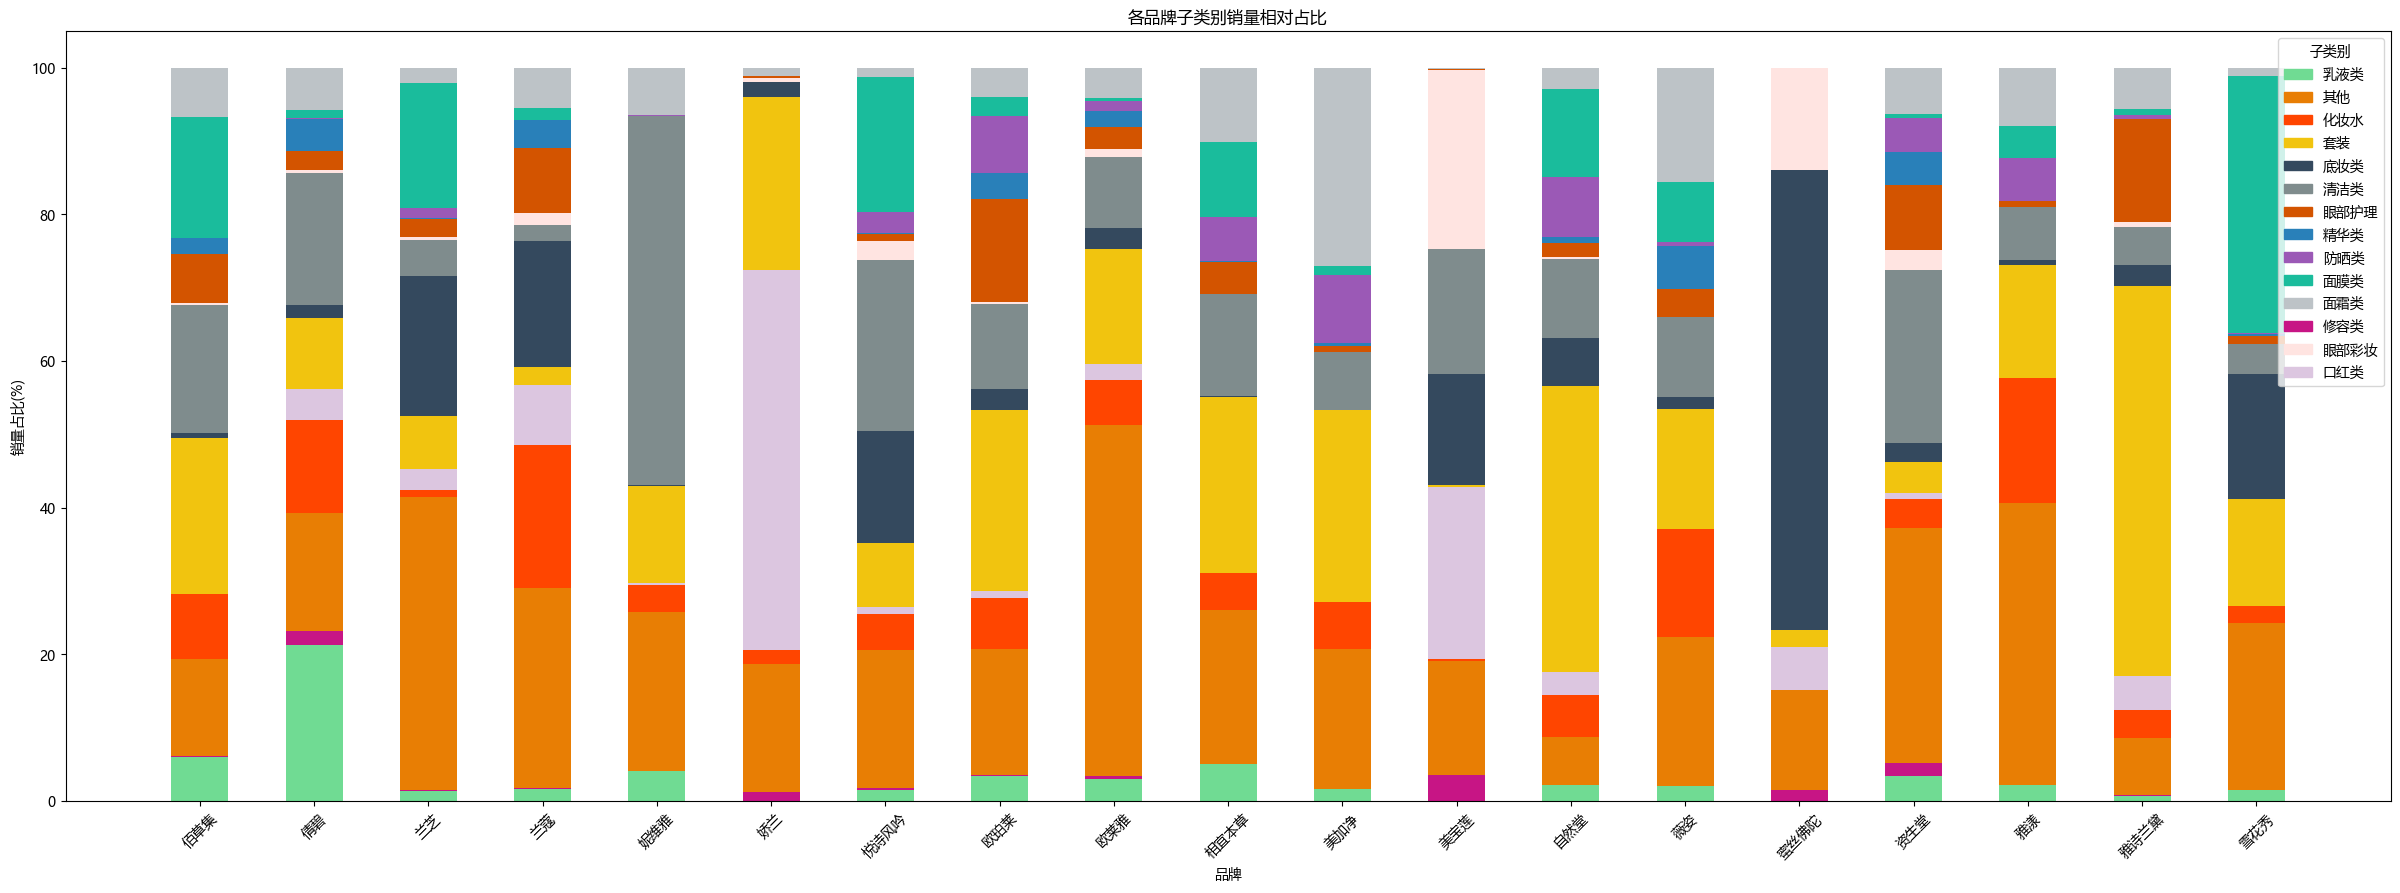

In [32]:
#颜色映射字典
subcolor_map = {
    '乳液类':'#70DB93',
    '其他': '#E87E04',
    '化妆水': '#FF4500',
    '套装':'#F1C40F',
    '底妆类':'#34495E',
    '清洁类': '#7F8C8D',
    '眼部护理':'#D35400',
    '精华类':'#2980B9',
    '防晒类': '#9B59B6',
   '面膜类': '#1ABC9C',
    '面霜类': '#BDC3C7',
    '修容类': '#C71585',
    '眼部彩妆':'#FFE4E1',
    '口红类': '#DCC6E0',
}
# 子类别销量相对占比
plt.figure(figsize = (30,10))

x_positions = np.arange(len(brands))
bar_width = 0.5

for idx,brand in enumerate(brands):
    brand_data = brandst_data[brandst_data['brand']== brand].reset_index()
    brand_data = brand_data.sort_values(by = 'sub_type')
    bottoms = np.zeros(len(brand_data))

    for i,row in brand_data.iterrows():
        plt.bar(x_positions[idx],row['count_percent'], bar_width, bottom = bottoms[i], color = subcolor_map.get(row['sub_type'],'black'))
        bottoms[i+1:] += row['count_percent']

plt.xticks(x_positions,brands, rotation = 45)

handles = [plt.Rectangle((0,0),1,1,color = subcolor_map[sub_type]) for sub_type in subcolor_map.keys()]
labels = subcolor_map.keys()
plt.legend(handles,labels,title = '子类别',loc = 'upper right')

plt.title('各品牌子类别销量相对占比',fontsize = 12)
plt.xlabel('品牌',fontsize = 10)
plt.ylabel('销量占比(%)',fontsize = 10)
plt.show()

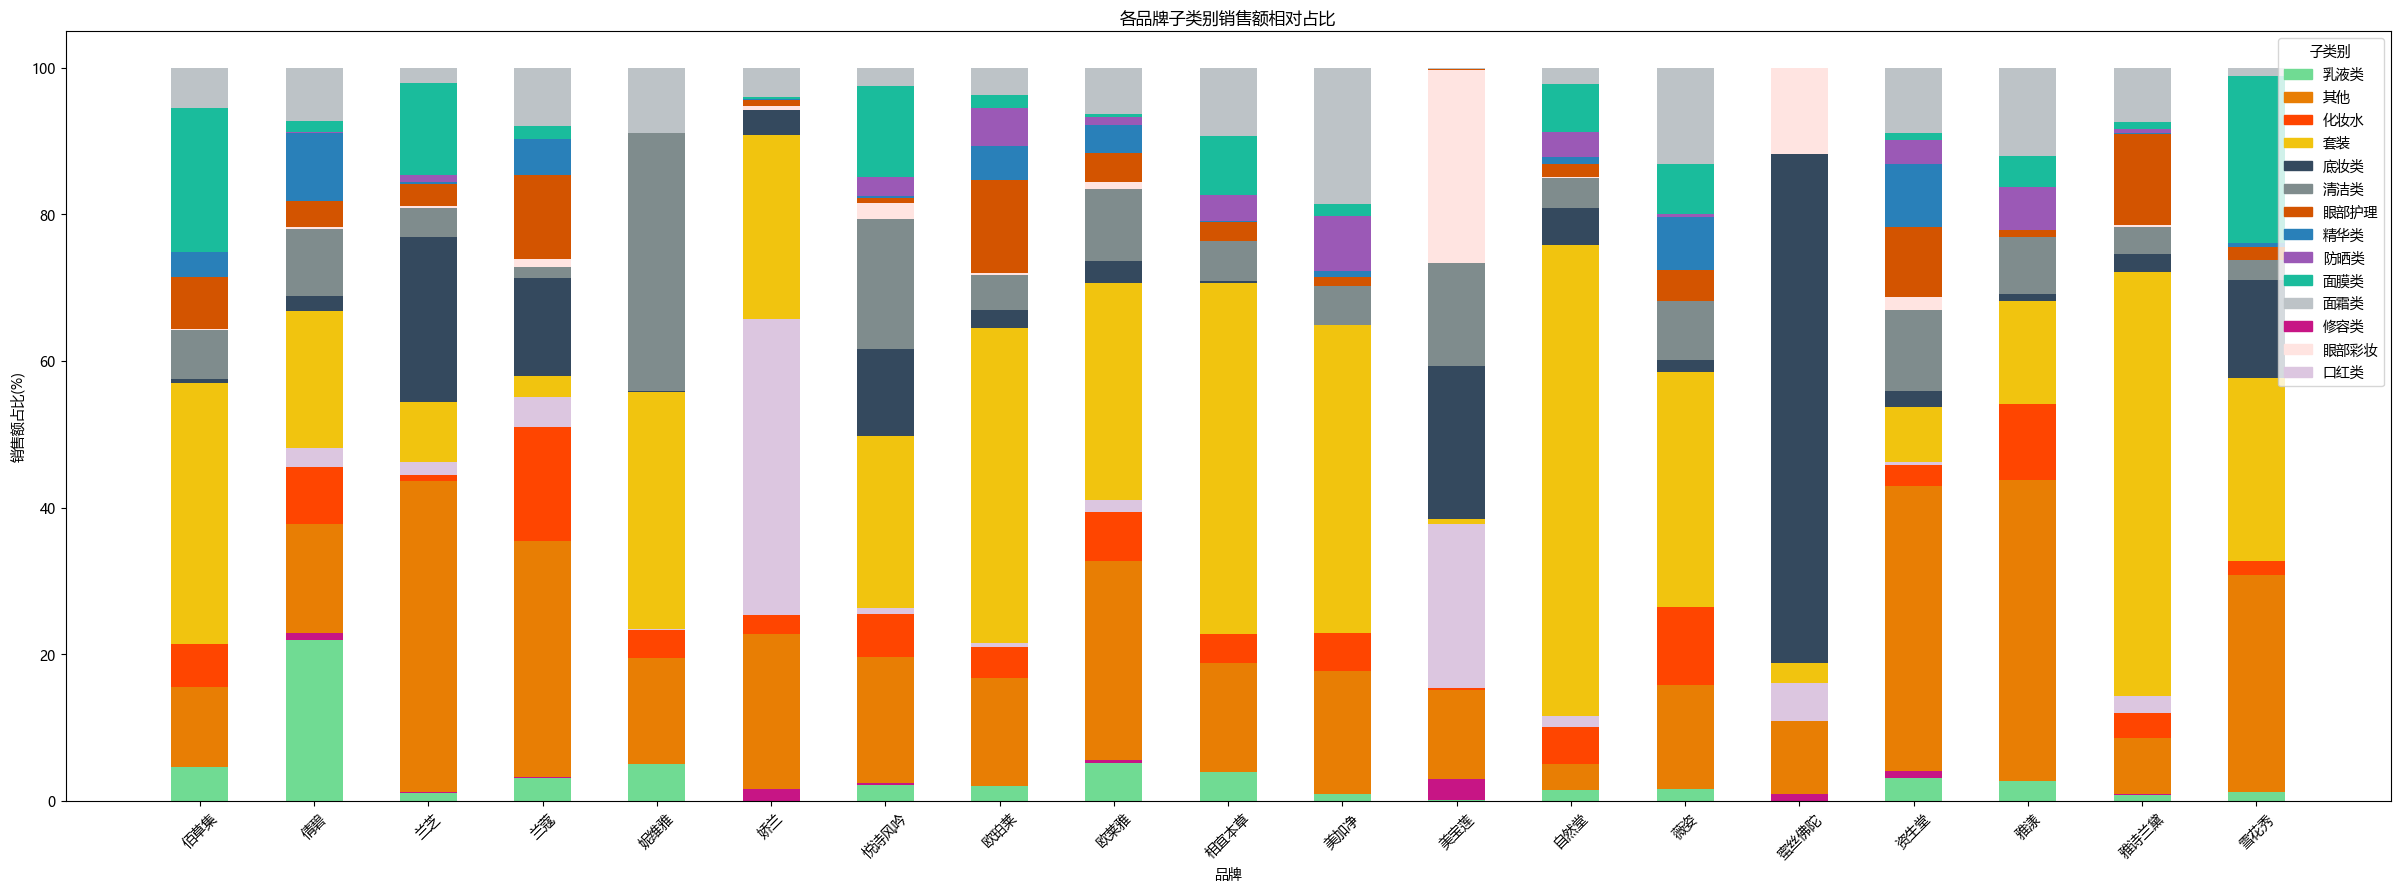

In [33]:
# 子类别销售额相对占比
plt.figure(figsize = (30,10))

x_positions = np.arange(len(brands))
bar_width = 0.5

for idx,brand in enumerate(brands):
    brand_data = brandst_data[brandst_data['brand']== brand].reset_index()
    brand_data = brand_data.sort_values(by = 'sub_type')
    bottoms = np.zeros(len(brand_data))

    for i,row in brand_data.iterrows():
        plt.bar(x_positions[idx],row['money_percent'], bar_width, bottom = bottoms[i], color = subcolor_map.get(row['sub_type'],'black'))
        bottoms[i+1:] += row['money_percent']

plt.xticks(x_positions,brands, rotation = 45)

handles = [plt.Rectangle((0,0),1,1,color = subcolor_map[sub_type]) for sub_type in subcolor_map.keys()]
labels = subcolor_map.keys()
plt.legend(handles,labels,title = '子类别',loc = 'upper right')

plt.title('各品牌子类别销售额相对占比',fontsize = 12)
plt.xlabel('品牌',fontsize = 10)
plt.ylabel('销售额占比(%)',fontsize = 10)
plt.show()

## 2.4热度分析

### 2.4.1 热度柱状图

In [34]:
#统计评论数均值
brand_pop = round(data.groupby('brand')['comment_count'].agg('mean').sort_values(ascending= False),2)
brand_pop

brand
美宝莲     3741.94
妮维雅     2851.69
自然堂     2227.48
相宜本草    2190.86
悦诗风吟    1949.82
雅漾      1756.20
蜜丝佛陀    1744.23
欧莱雅     1213.41
兰芝       802.88
美加净      575.18
佰草集      511.92
倩碧       434.51
欧珀莱      394.28
兰蔻       347.80
雅诗兰黛     346.75
薇姿       302.14
雪花秀      197.14
资生堂       48.93
娇兰        42.83
Name: comment_count, dtype: float64

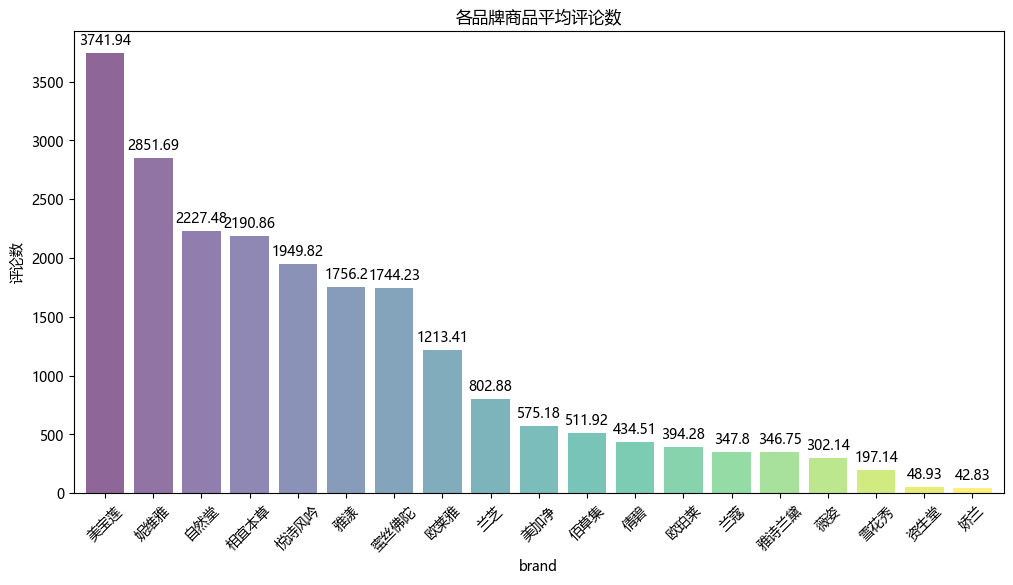

In [35]:
# 可视化
plt.figure(figsize = (12,6))
ax = brand_pop.plot(kind = 'bar',width = 0.8, alpha = 0.6, color = get_colors(brands))
# 显示数据标签
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width()/2 , height),
                xytext = (0,3),
                textcoords = "offset points",
                ha = 'center', va = 'bottom'
               )
    
plt.title('各品牌商品平均评论数')
plt.ylabel('评论数')
plt.xticks(rotation = 45)
plt.show()

### 2.4.2 销量、热度、价格散点图

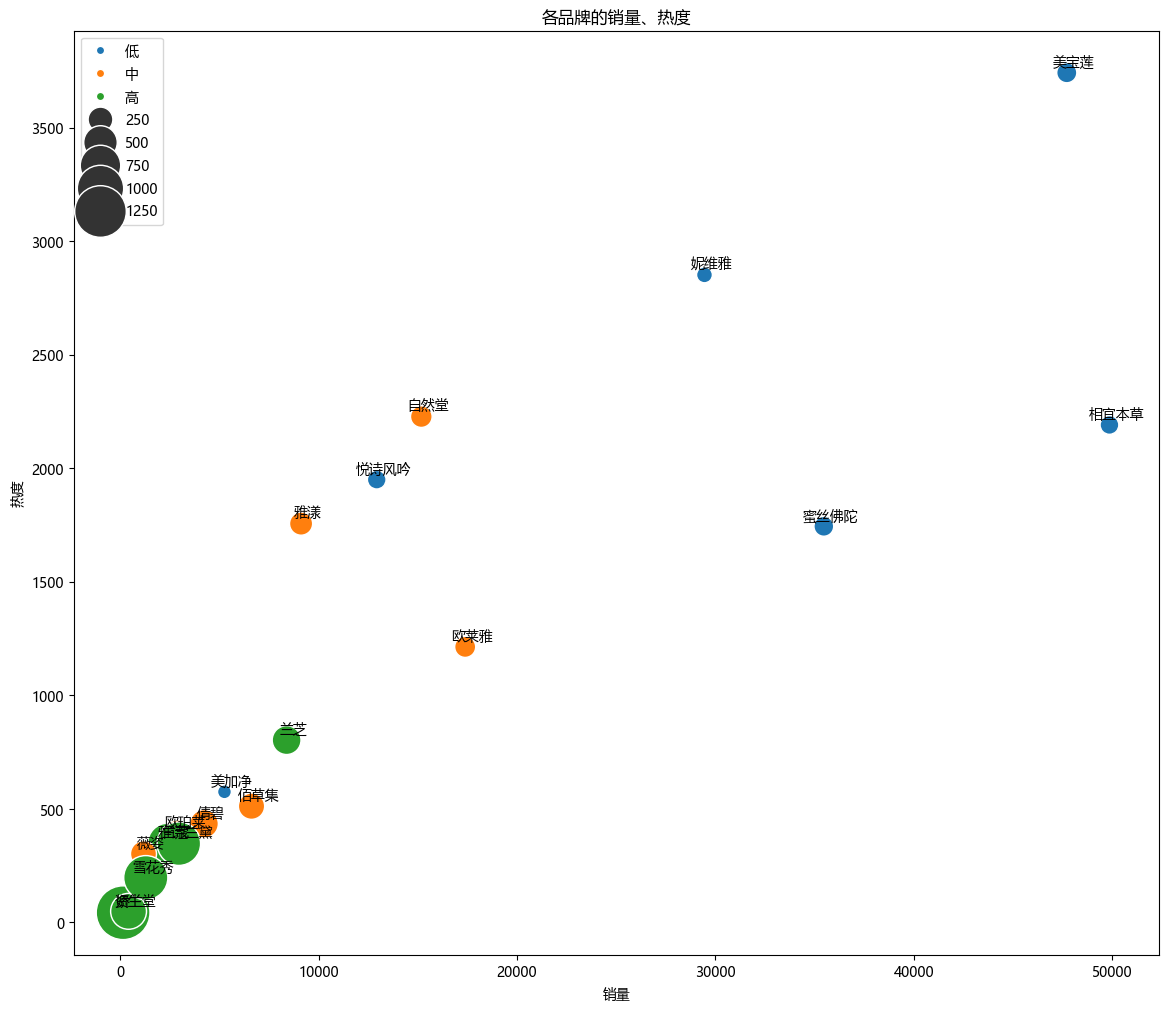

In [36]:
x = round(data.groupby('brand')['sale_count'].agg('mean'),2) #各品牌销量均值

y = round(data.groupby('brand')['comment_count'].agg('mean'),2) # 各品牌评论数均值

s = round(data.groupby('brand')['price'].agg('mean') ,2) #各品牌价格均值
'''
使用 .size() 计算每个组的大小，得到一个 Series。
对于这个例子，可能得到类似 {'brand1': 2, 'brand2': 2, 'brand3': 1} 的 Series，其中键是品牌名称，值是该品牌出现的次数。
使用 .index 从这个 Series 中提取索引，也就是品牌名称，结果会是一个包含 ['brand1', 'brand2', 'brand3'] 的 Index 对象。
'''
txt = data.groupby('brand').size().index # 获取品牌文本（即品牌名称）

# 基于x,y,s 这三个维度绘制气泡图
plt.figure(figsize = (14,12))

# hue参数应该设置为一个分类变量，以便为不同的类别生成不同的颜色
# 使用 pd.cut 函数将 s 列的数据划分为三个类别（低、中、高）
# bins=[0, s.quantile(0.33), s.quantile(0.67), s.max()] 定义了三个分位数作为分割点
# labels=['低', '中', '高'] 为每个类别分配标签
price_categories = pd.cut(s,bins = [0,s.quantile(0.33),s.quantile(0.67),s.max()],labels = ['低','中','高'])


# 使用 seaborn 的 scatterplot 绘制气泡图
# x=x 表示 x 轴的数据来自 x 变量
# y=y 表示 y 轴的数据来自 y 变量
# size=s 表示气泡的大小由 s 变量决定
# hue=s 表示使用 s 变量为不同的类别生成不同的颜色
# sizes=(100, 1500) 设定气泡大小的范围，最小为 100，最大为 1500
scatter = sns.scatterplot(
                  x = x,
                  y =y, 
                  size = s, #点大小由价格均值决定
                  hue = price_categories, # 气泡大小的设定，现设定为销量的均值，可调整
                  sizes = (100,1500), #点大小阈值范围
                  )
# 标注每个点对应的品牌文本
for i in range(len(txt)):
    plt.annotate(txt[i],#品牌文本
                xy = (x.iloc[i], y.iloc[i]),#点的坐标
                xytext = (5,5),# 文本相对于点的偏移量
                textcoords = "offset points",
                ha = 'center'
                )
    
# 图标基本配置
plt.ylabel('热度')
plt.xlabel('销量')
plt.title('各品牌的销量、热度')
# 设置图表的对齐方式（左上方开始）
plt.legend(loc = 'upper left')
plt.show()

In [37]:
# 气泡图统计分信息结果保存
bubble_data =pd.concat([x,y,s],axis = 1)
# 重置索引
bubble_data.reset_index(inplace = True)
# 列重命名
bubble_data.rename(columns = {'brand':'品牌',
                             'sale_count':'销量',
                             'price':'平均价格',
                             'comment_count':'评论数'},
                  inplace = True)
bubble_data.to_csv('./热度气泡图.csv',index = False)

## 2.5 价格分析

### 2.5.1 价格箱型图

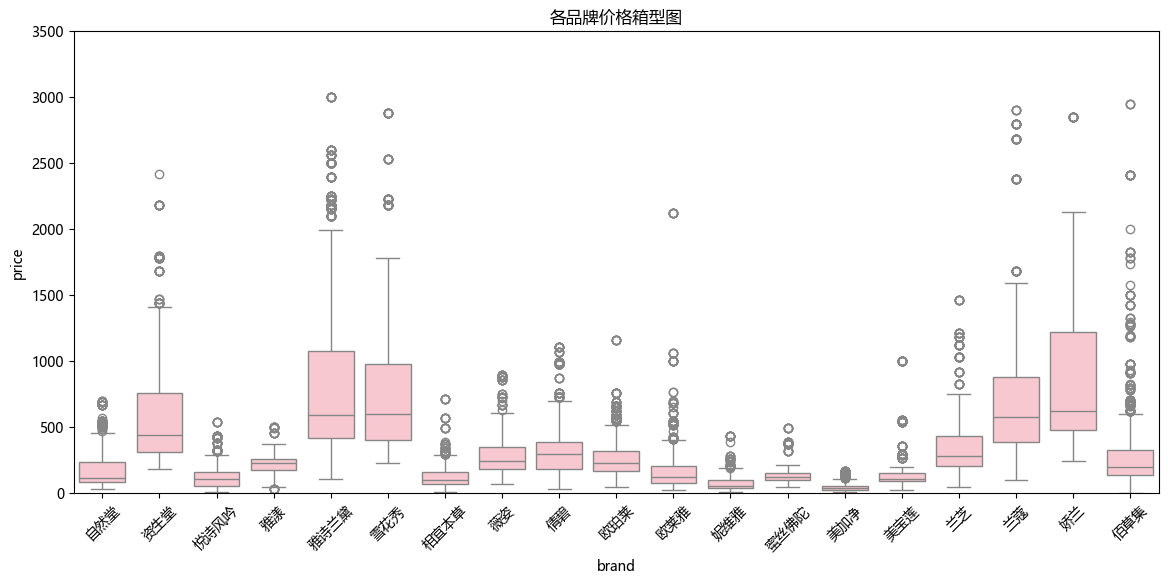

In [38]:
# 通过箱型图了解各品牌价格的分布情况

#查看价格的箱型图
plt.figure(figsize = (14,6))
sns.boxplot(x = 'brand',
           y = 'price',
           data = data,
           color = 'pink')
plt.ylim(0,3500) # 如果不限制，就不容易看清箱型，所以把轴缩小
plt.title("各品牌价格箱型图")
plt.xticks(rotation = 45)
plt.show()

### 2.5.2 品牌平均价格对比

In [39]:
avg_price = round(data.groupby('brand')['price'].agg('mean'),2)
avg_price

brand
佰草集      289.82
倩碧       346.09
兰芝       356.62
兰蔻       756.40
妮维雅       73.79
娇兰      1361.04
悦诗风吟     121.25
欧珀莱      276.22
欧莱雅      167.28
相宜本草     122.96
美加净       44.69
美宝莲      148.76
自然堂      180.13
薇姿       281.09
蜜丝佛陀     142.12
资生堂      577.44
雅漾       212.62
雅诗兰黛     872.47
雪花秀      901.08
Name: price, dtype: float64

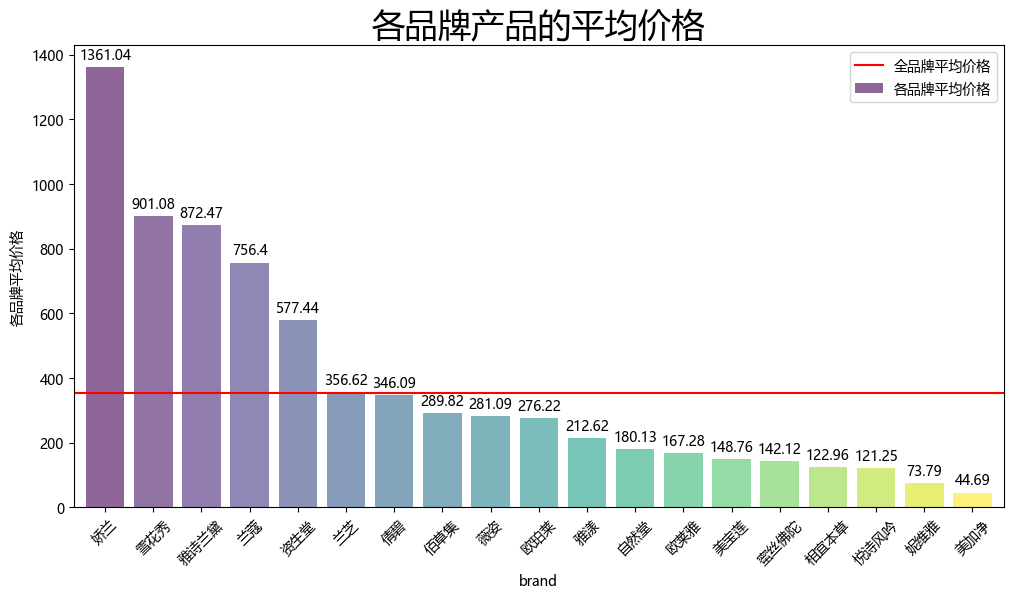

In [40]:
# 可视化
fig = plt.figure(figsize = (12,6))
ax  = plt.gca()
avg_price.sort_values(ascending = False).plot(kind = 'bar', width = 0.8, alpha = 0.6,color = get_colors(brands),ax = ax,label = '各品牌平均价格')
y = data['price'].agg('mean')
plt.axhline(y,0 ,5, color = 'red', label = '全品牌平均价格')
#ax.patches 包含了柱状图的每个条
for p in ax.patches:
    # 获取当前条的高度
    height = p.get_height() 
    # 使用 ax.annotate 方法添加注释
    # 标注的内容是条的高度，使用 format 函数将高度转换为字符串
    # xy 是标注的位置，为条的中心位置，x 坐标为条的起始位置加上条宽的一半，y 坐标为条的高度
    # xytext 是文本的偏移量，这里是相对于 xy 位置向上偏移 3 个点
    # textcoords='offset points' 表示 xytext 的坐标单位是点
    # ha='center' 表示水平对齐方式为居中
    # va='bottom' 表示垂直对齐方式为底部
    ax.annotate(
        '{}'.format(height),#标注内容为条高度
        xy = (p.get_x()+ p.get_width()/2, height),
        xytext = (0,3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格', fontsize = 24)
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.show()

## 2.6 基于时间序列：销售趋势

In [41]:
data['update_time'] = pd.to_datetime(data['update_time'])
day_salecnt = data.groupby('update_time')['sale_count'].agg(sum)
day_salemon = data.groupby('update_time')['sale_money'].agg(sum)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\4001385108.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  day_salecnt = data.groupby('update_time')['sale_count'].agg(sum)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\4001385108.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  day_salemon = data.groupby('update_time')['sale_money'].agg(sum)


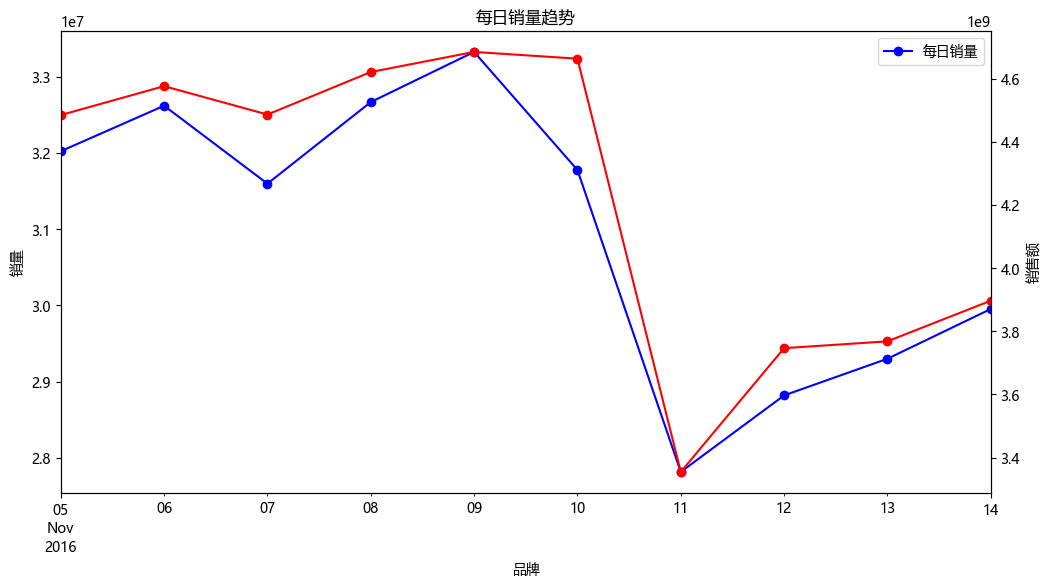

In [42]:
fig, ax = plt.subplots(1,1,figsize = (12,6))

day_salecnt.plot(kind = 'line', ax = ax ,marker = 'o',color = 'blue',linestyle = '-', label = '每日销量')
ax.set_title('每日销量趋势',fontsize = 12)
ax.set_xlabel('品牌',fontsize = 10)
ax.set_ylabel('销量', fontsize = 10)

ax2 = ax.twinx()
day_salemon.plot(kind = 'line', ax = ax2, marker = 'o', color = 'red', linestyle = '-', label = '每日销售额')
ax2.set_ylabel('销售额',fontsize = 10)
# 获取 ax 的图例手柄和标签
# handles, labels = ax.get_legend_handles_labels() 获取 ax 的图例手柄和标签
handles, labels = ax.get_legend_handles_labels()
# 获取 ax2 的图例手柄和标签
# handles2, labels2 = ax2.get_legend_handles_labels() 获取 ax2 的图例手柄和标签
handles2, lables2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc = 'upper right')
plt.show()

In [43]:
#随机生成颜色
def randomColor(brands):
    brand_colors = {}#创建新列表
    for brand in brands:
        color = np.random.choice(list('0123456789ABCDEF'),size = (6,))
        brand_colors[brand] ='#'+''.join(color)
    return brand_colors

In [44]:
day_brand = data.groupby(['brand','update_time'])[['sale_count','sale_money']].agg(sum).reset_index()
brands = day_brand['brand'].unique()
brand_colors = randomColor(brands)
brands
for brand in brands:
    print(f'{brand}')
    print('{}'.format(brand))
    print('-------')

佰草集
佰草集
-------
倩碧
倩碧
-------
兰芝
兰芝
-------
兰蔻
兰蔻
-------
妮维雅
妮维雅
-------
娇兰
娇兰
-------
悦诗风吟
悦诗风吟
-------
欧珀莱
欧珀莱
-------
欧莱雅
欧莱雅
-------
相宜本草
相宜本草
-------
美加净
美加净
-------
美宝莲
美宝莲
-------
自然堂
自然堂
-------
薇姿
薇姿
-------
蜜丝佛陀
蜜丝佛陀
-------
资生堂
资生堂
-------
雅漾
雅漾
-------
雅诗兰黛
雅诗兰黛
-------
雪花秀
雪花秀
-------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\472286211.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  day_brand = data.groupby(['brand','update_time'])[['sale_count','sale_money']].agg(sum).reset_index()


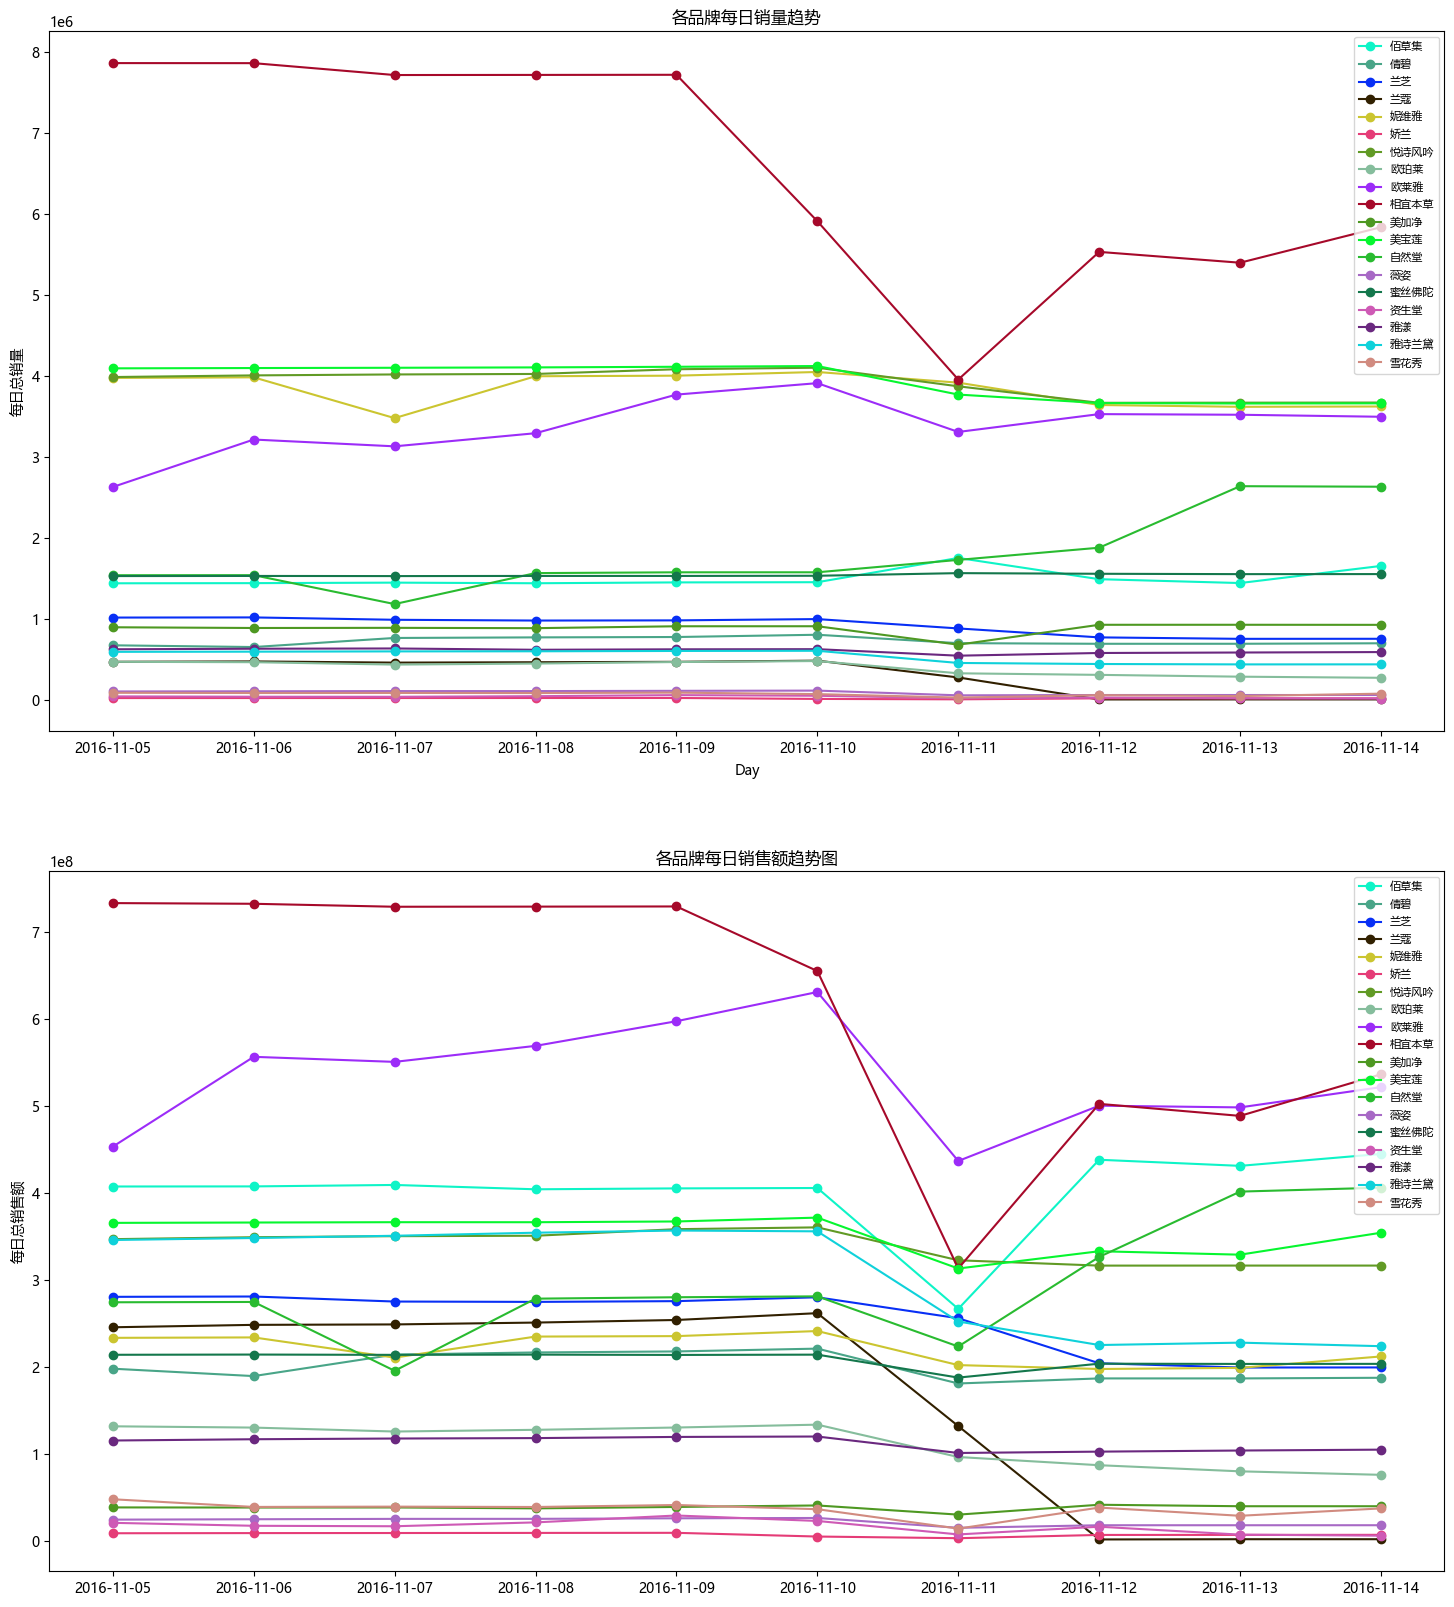

In [45]:
fig , axes = plt.subplots(nrows = 2, ncols = 1,figsize = (18,20))
for brand in brands:
    subset = day_brand[day_brand['brand'] == brand]
    axes[0].plot(subset['update_time'], subset['sale_count'],label = f'{brand}', marker = 'o',color = brand_colors[brand],linestyle = '-')

for brand in brands:
    subset = day_brand[day_brand['brand'] == brand]
    axes[1].plot(subset['update_time'],subset['sale_money'],label =  '{}'.format(brand),marker = 'o', color = brand_colors[brand],linestyle = '-')

axes[0].set_title('各品牌每日销量趋势', fontsize = 12)
axes[1].set_title('各品牌每日销售额趋势图',fontsize = 12)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('每日总销量',color = 'k')
axes[1].set_ylabel('每日总销售额',color = 'k')

axes[0].legend(loc='upper right',fontsize = 8)
axes[1].legend(loc='upper right',fontsize = 8)
plt.show()

In [46]:
# 统计品牌每天变化趋势
# 按 'day' 和 'brand' 进行分组，并对 'sale_count' 列进行求和聚合
# data.groupby(['day', 'brand'])['sale_count'].agg(sum) 按 'day' 和 'brand' 对数据进行分组，并对 'sale_count' 列进行求和操作
#.unstack(level=1) 将结果中的二级索引（这里是 'brand'）转换为列索引
#.reset_index() 将结果的索引重置为默认的整数索引
sale_transformation = data.groupby(['day','brand'])['sale_count'].agg(sum).unstack(level = 1).reset_index()
# sale_transformation 的两层索引全部转化到列索引上
sale_transformation

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\3226161709.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sale_transformation = data.groupby(['day','brand'])['sale_count'].agg(sum).unstack(level = 1).reset_index()


brand,day,佰草集,倩碧,兰芝,兰蔻,妮维雅,娇兰,悦诗风吟,欧珀莱,欧莱雅,相宜本草,美加净,美宝莲,自然堂,薇姿,蜜丝佛陀,资生堂,雅漾,雅诗兰黛,雪花秀
0,5,1437886.0,672581.0,1014916.0,469012.0,3972389.0,21523.0,3983286.0,468769.0,2626359.0,7857652.0,895145.0,4090577.0,1537672.0,102850.0,1526969.0,42210.0,623358.0,592002.0,86607.0
1,6,1439717.0,651194.0,1016749.0,473758.0,3979540.0,21859.0,4003622.0,464134.0,3211945.0,7856894.0,886297.0,4094255.0,1538037.0,105157.0,1528591.0,38017.0,630427.0,593992.0,83794.0
2,7,1446001.0,763167.0,987563.0,458931.0,3476261.0,22089.0,4015237.0,434510.0,3128074.0,7710323.0,888071.0,4097576.0,1181392.0,107549.0,1526792.0,37270.0,633581.0,597458.0,84731.0
3,8,1438328.0,770344.0,978082.0,463644.0,3993028.0,22336.0,4021346.0,447210.0,3290104.0,7711768.0,884089.0,4102207.0,1563599.0,107507.0,1528663.0,44559.0,617411.0,598736.0,83268.0
4,9,1448884.0,774890.0,980249.0,468765.0,4000143.0,22528.0,4079415.0,466119.0,3766659.0,7713348.0,907424.0,4109948.0,1573467.0,110709.0,1528486.0,57840.0,623145.0,602891.0,88636.0
5,10,1451283.0,802847.0,996188.0,483199.0,4045684.0,10784.0,4098469.0,478367.0,3907779.0,5906458.0,907806.0,4119040.0,1573684.0,113568.0,1530687.0,49783.0,624950.0,604950.0,70203.0
6,11,1750778.0,699142.0,880736.0,275733.0,3913823.0,5872.0,3868726.0,327106.0,3305700.0,3952281.0,680223.0,3766878.0,1726660.0,55297.0,1563277.0,19231.0,544513.0,454664.0,27543.0
7,12,1488526.0,691342.0,770399.0,4263.0,3638057.0,18134.0,3665169.0,307731.0,3525720.0,5527695.0,925773.0,3662142.0,1877051.0,59105.0,1555318.0,28036.0,577729.0,441901.0,57106.0
8,13,1440908.0,691524.0,752341.0,4858.0,3615817.0,18198.0,3666842.0,285389.0,3517852.0,5394190.0,925980.0,3656703.0,2636236.0,59140.0,1550955.0,18173.0,583614.0,437081.0,45887.0
9,14,1652153.0,697529.0,753021.0,4843.0,3619718.0,18305.0,3668384.0,271637.0,3492963.0,5832338.0,925098.0,3658762.0,2629654.0,59208.0,1551509.0,16102.0,589123.0,437463.0,75856.0


In [47]:
sale_transformation['总销量'] = data.groupby('day')['sale_count'].agg(sum).values
sale_transformation.rename(columns = {'day':'日期'}).to_csv('./销售变化趋势图（天）.csv',index = False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\3679765743.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sale_transformation['总销量'] = data.groupby('day')['sale_count'].agg(sum).values


## 2.7 男性专用产品分析

In [48]:
only = data.groupby(['man_only','brand'])[['sale_count','sale_money']].agg(sum)
only

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\1754160931.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  only = data.groupby(['man_only','brand'])[['sale_count','sale_money']].agg(sum)


sale_count    sale_money
man_only brand                          
否        佰草集    14919413.0  4.005295e+09
         倩碧      6578518.0  1.836525e+09
         兰芝      9032125.0  2.508946e+09
         兰蔻      3104148.0  1.645273e+09
         妮维雅     5284421.0  2.145480e+08
         娇兰       181485.0  7.550458e+07
         悦诗风吟   38567774.0  3.317448e+09
         欧珀莱     3666153.0  1.076965e+09
         欧莱雅    18242527.0  3.649802e+09
         相宜本草   60547418.0  5.875373e+09
         美加净     8825906.0  3.851918e+08
         美宝莲    39358088.0  3.531516e+09
         自然堂    17317977.0  2.895689e+09
         薇姿       857777.0  2.180951e+08
         蜜丝佛陀   15391247.0  2.082466e+09
         资生堂      271664.0  1.488246e+08
         雅漾      6047851.0  1.120840e+09
         雅诗兰黛    5361138.0  3.040252e+09
         雪花秀      701084.0  3.621146e+08
是        佰草集       75051.0  1.338436e+07
         倩碧       636042.0  1.626746e+08
         兰芝        98119.0  1.671926e+07
         兰蔻         2858.0  2.068210e+06
         妮维雅    32970039.0  1.985619e+09
         娇兰          143.0  9.722000e+04
         悦诗风吟     502722.0  6.951438e+07
         欧珀莱      284819.0  4.250036e+07
         欧莱雅    15530628.0  1.662676e+09
         相宜本草    4915529.0  2.704176e+08
         自然堂      519475.0  4.546345e+07
         薇姿        22313.0  4.647385e+06
         资生堂       79557.0  1.789800e+07
         雪花秀        2547.0  7.914600e+05

### 2.7.1 男性产品总销量、销售额占比

In [49]:
onlyman_salecnt = data.groupby('man_only')['sale_count'].sum().sort_values(ascending = True)
onlyman_salemon = data.groupby('man_only')['sale_money'].sum().sort_values(ascending = True)

onlyman_salecnt

man_only
是     55639842.0
否    254256714.0
Name: sale_count, dtype: float64

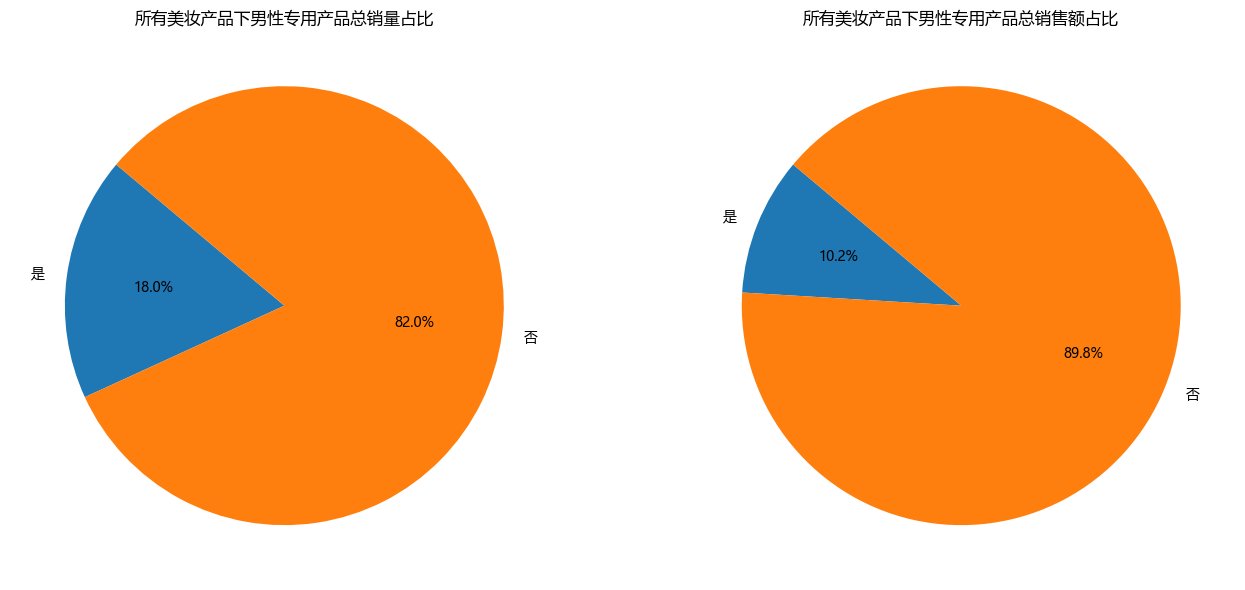

In [50]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.pie(onlyman_salecnt,labels =onlyman_salecnt.index,autopct = '%1.1f%%', startangle = 140 )
plt.title('所有美妆产品下男性专用产品总销量占比', fontsize = 12)

plt.subplot(1,2,2)
plt.pie(onlyman_salemon,labels =onlyman_salemon.index,autopct = '%1.1f%%', startangle = 140)
plt.title('所有美妆产品下男性专用产品总销售额占比',fontsize = 12)
plt.tight_layout()
plt.show()

In [51]:
#筛选出男性专用商品
man = data[data['man_only']=='是']


### 2.7.2 各品牌男性产品的销量、销售额占比

In [52]:
man_salecnt = man.groupby('brand')['sale_count'].sum().sort_values(ascending= True)

man_salemon = man.groupby('brand')['sale_money'].sum().sort_values(ascending = True)

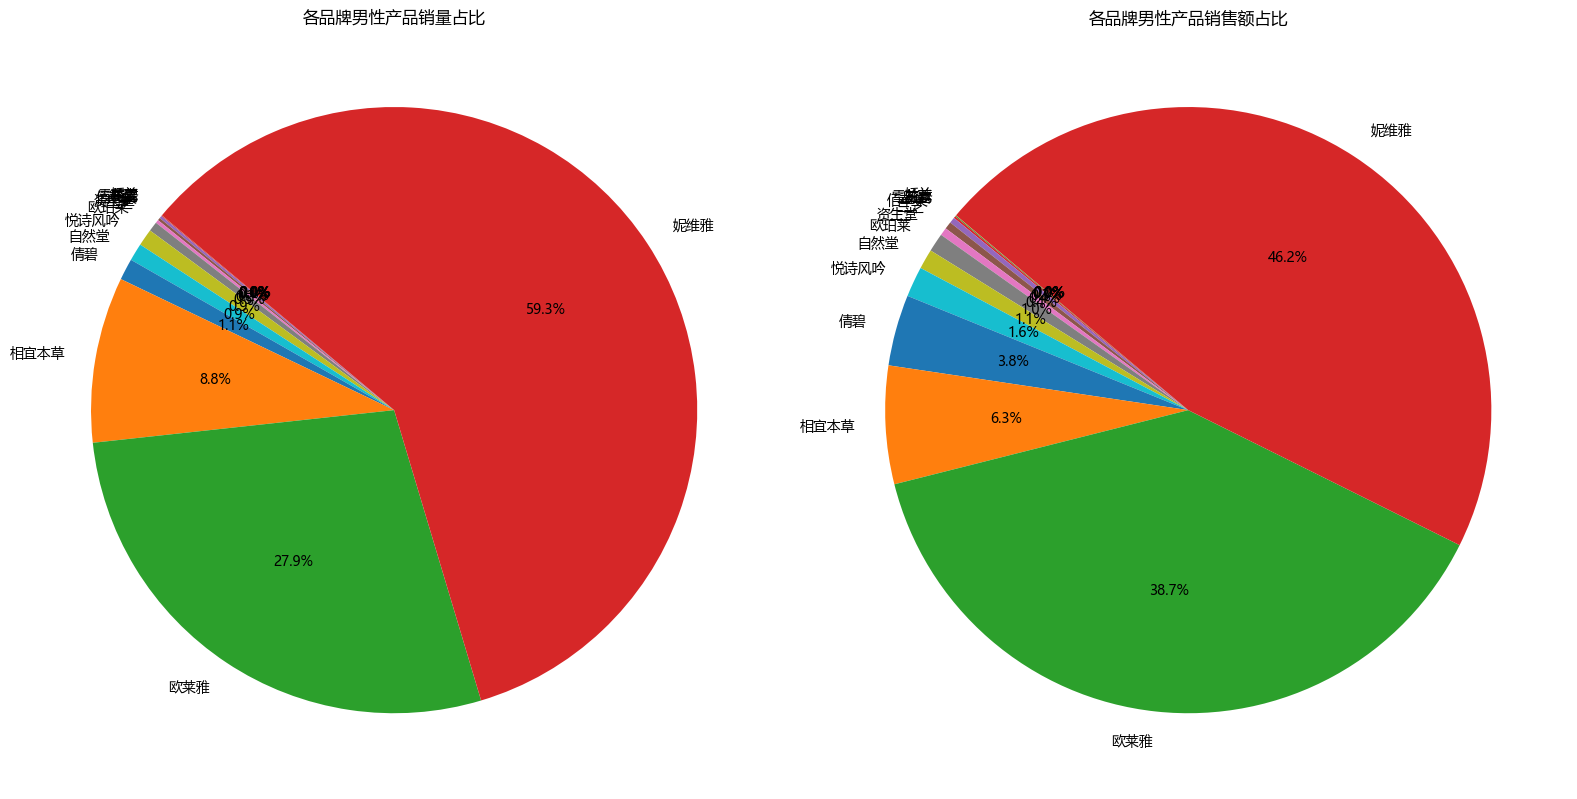

In [53]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.pie(man_salecnt,labels = man_salecnt.index, autopct = '%1.1f%%',startangle = 140)
plt.title('各品牌男性产品销量占比',fontsize =12)

plt.subplot(1,2,2)
plt.pie(man_salemon,labels = man_salemon.index, autopct = '%1.1f%%', startangle = 140)
plt.title('各品牌男性产品销售额占比',fontsize = 12)

plt.tight_layout()
plt.show()

### 2.7.3 男性产品主类别分析

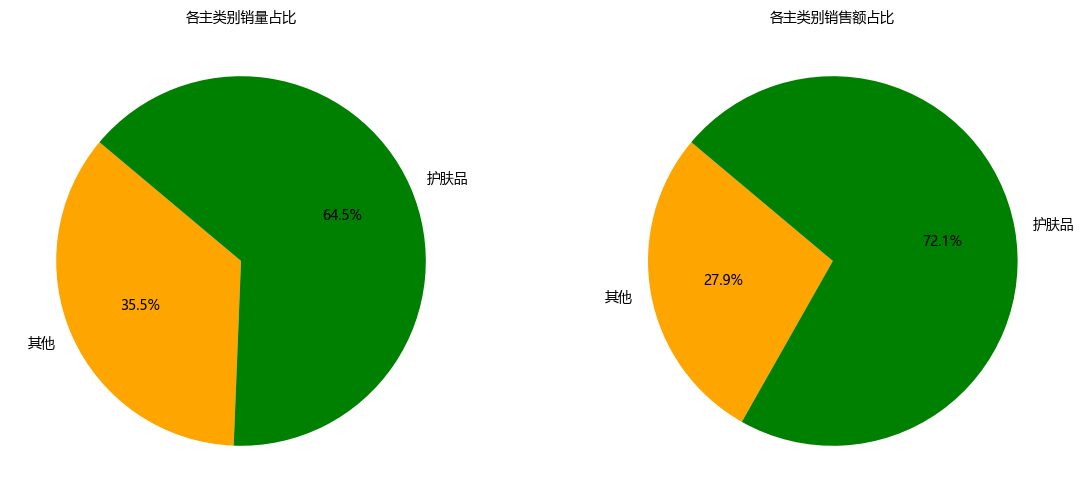

In [54]:
#各主类别销量、销售额分析
manb_salecnt = man.groupby('main_type')['sale_count'].sum().sort_values(ascending = True)
manb_salecnt
manb_salemon = man.groupby('main_type')['sale_money'].sum().sort_values(ascending = True)
manb_salemon

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(manb_salecnt,labels = manb_salecnt.index, autopct = '%1.1f%%', startangle = 140,colors = ['orange','green'])
plt.title('各主类别销量占比',fontsize = 10)

plt.subplot(1,2,2)
plt.pie(manb_salemon, labels = manb_salemon.index, autopct = '%1.1f%%', startangle = 140,colors = ['orange','green'])
plt.title('各主类别销售额占比',fontsize = 10)

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24764\3398747583.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  manonly_mtdata = man.groupby(['brand','main_type'])[['sale_count','sale_money']].agg(sum).reset_index()


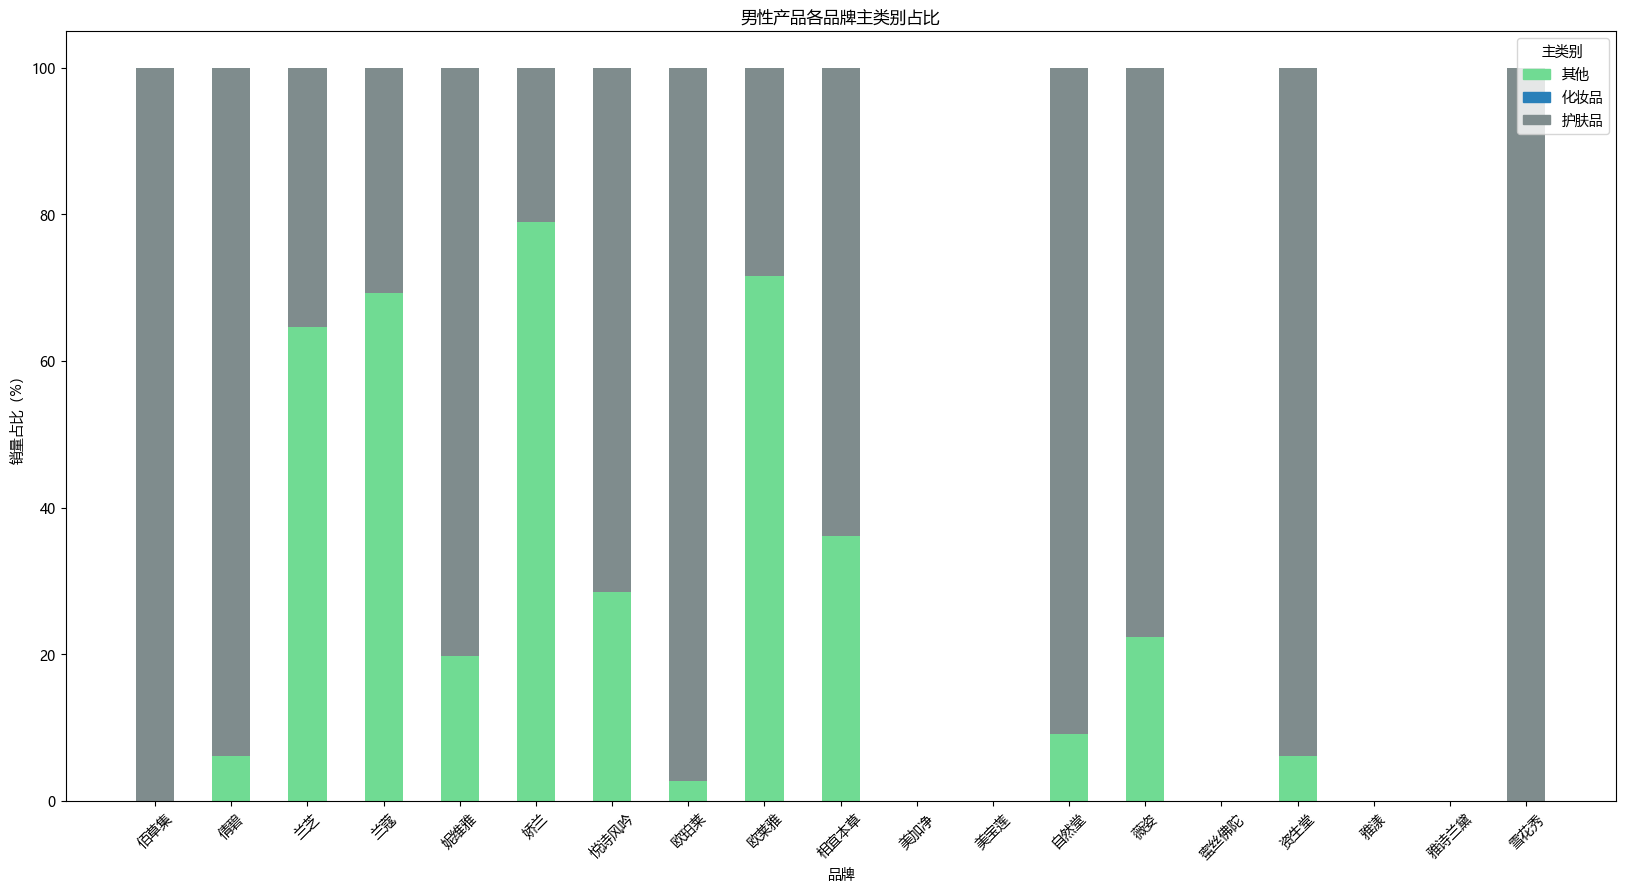

In [56]:
# 主类别销量相对占比
manonly_mtdata = man.groupby(['brand','main_type'])[['sale_count','sale_money']].agg(sum).reset_index()

brand_list = manonly_mtdata['brand'].unique()

manonly_mtdata['count_total'] = manonly_mtdata.groupby('brand')['sale_count'].transform('sum')
manonly_mtdata['money_total'] = manonly_mtdata.groupby('brand')['sale_money'].transform('sum')

manonly_mtdata['count_percent'] = manonly_mtdata.apply(lambda row: row['sale_count']/row['count_total']*100 if row['count_total'] != 0 else 0, axis =1)
manonly_mtdata['money_percent'] = manonly_mtdata.apply(lambda row: row['sale_money']/row['money_total']*100 if row['money_total']!= 0 else 0, axis = 1)

maincolor_map = {
    '其他':'#70DB93',
    '化妆品':'#2980B9',
    '护肤品':'#7F8C8D'
}
plt.figure(figsize = (20,10))

x.positions = np.arange(len(brands))
bar_width = 0.5

for idx,brand in enumerate(brands):
    brand_data = manonly_mtdata[manonly_mtdata['brand'] == brand].reset_index()
    brand_data = brand_data.sort_values(by= 'main_type')
    bottoms = np.zeros(len(manonly_mtdata))
    
    for i,row in brand_data.iterrows():
        plt.bar(x_positions[idx], row['count_percent'],width = bar_width, bottom = bottoms[i], color = maincolor_map.get(row['main_type'],'black'))
        bottoms[i+1:] += row['count_percent']
        
plt.xticks(x_positions, brands, rotation = 45)

handles = [plt.Rectangle((0,0), 1, 1, color = maincolor_map[main_type]) for main_type in maincolor_map.keys()]
labels = maincolor_map.keys()
plt.legend(handles, labels, title = '主类别')

plt.title('男性产品各品牌主类别占比')
plt.xlabel('品牌')
plt.ylabel('销量占比（%）')
plt.show()

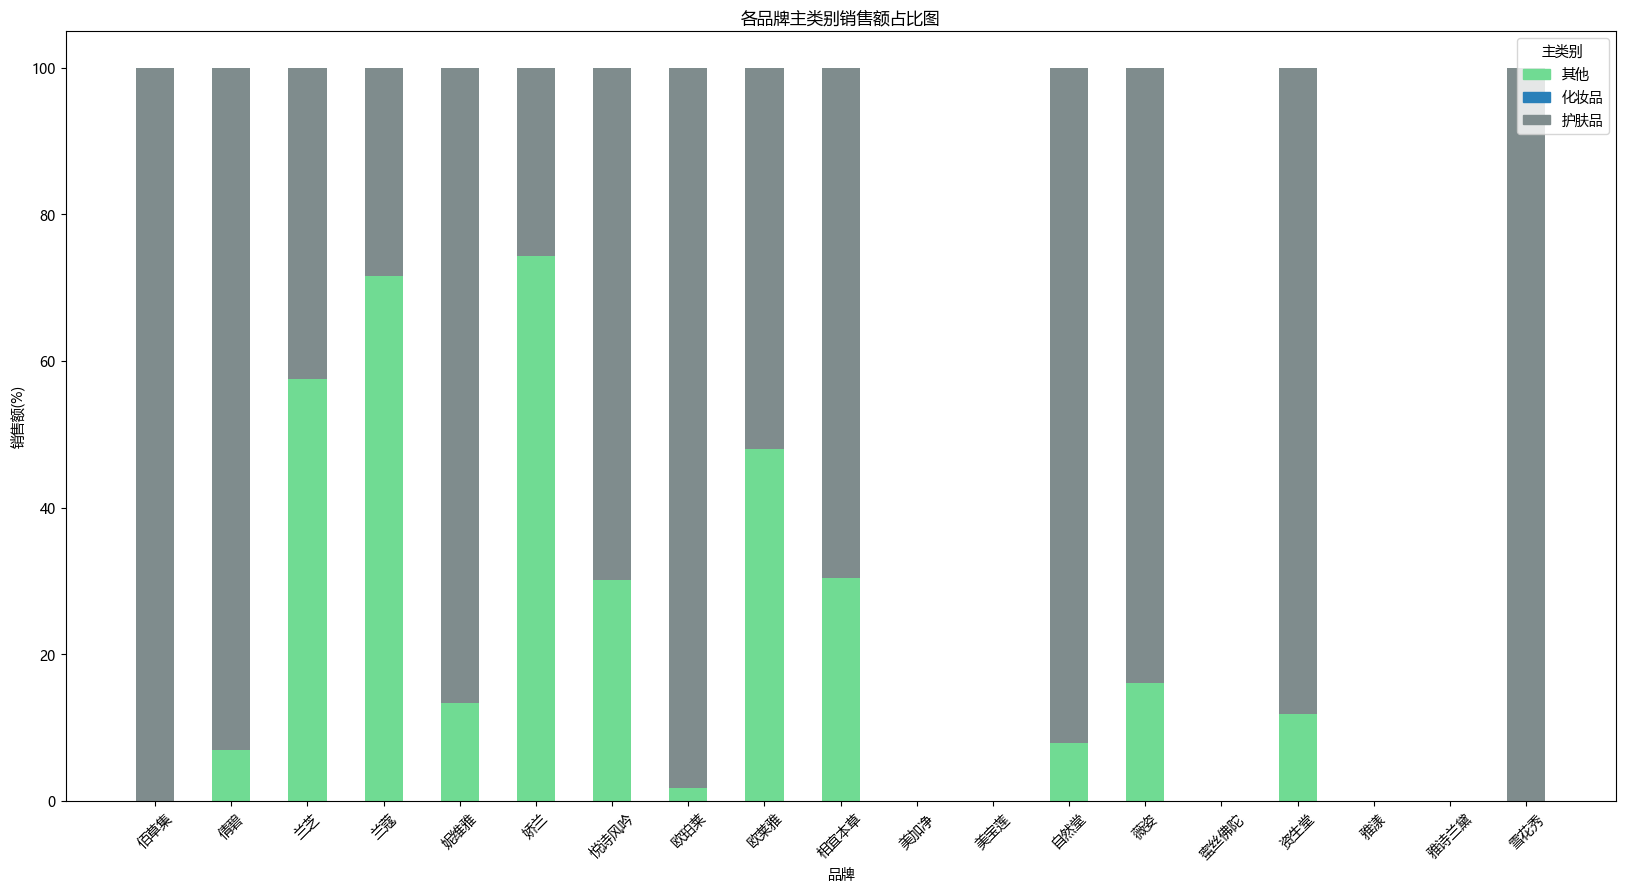

In [57]:
#主类别销售额相对占比
plt.figure(figsize = (20,10))
for idx, brand in enumerate(brands):
    brand_data = manonly_mtdata[manonly_mtdata['brand']==brand].reset_index()
    brand_data = brand_data.sort_values(by = 'main_type')
    bottoms = np.zeros(len(brand_data))
    
    for i,row in brand_data.iterrows():
        plt.bar(x_positions[idx],row['money_percent'],width = bar_width, bottom = bottoms[i], color = maincolor_map.get(row['main_type'],'black'))
        bottoms[i+1:] += row['money_percent']
        
plt.xticks(x_positions, brands, rotation = 45)
handles = [plt.Rectangle((0,0),1 ,1, color = maincolor_map[main_type]) for main_type in maincolor_map.keys()]
labels = maincolor_map.keys()
plt.legend(handles, labels, title = '主类别')

plt.title('各品牌主类别销售额占比图')
plt.xlabel('品牌')
plt.ylabel('销售额(%)')
plt.show()

In [58]:
brandman_pop = man.groupby('brand')['comment_count'].sum().sort_values(ascending = False)
brandman_pop

brand
妮维雅     3279097.0
欧莱雅      620702.0
相宜本草     329427.0
倩碧        73905.0
悦诗风吟      65864.0
自然堂       57359.0
欧珀莱       28922.0
兰芝        10856.0
佰草集        6339.0
资生堂        6187.0
薇姿         5150.0
兰蔻         1298.0
雪花秀         743.0
娇兰           36.0
Name: comment_count, dtype: float64

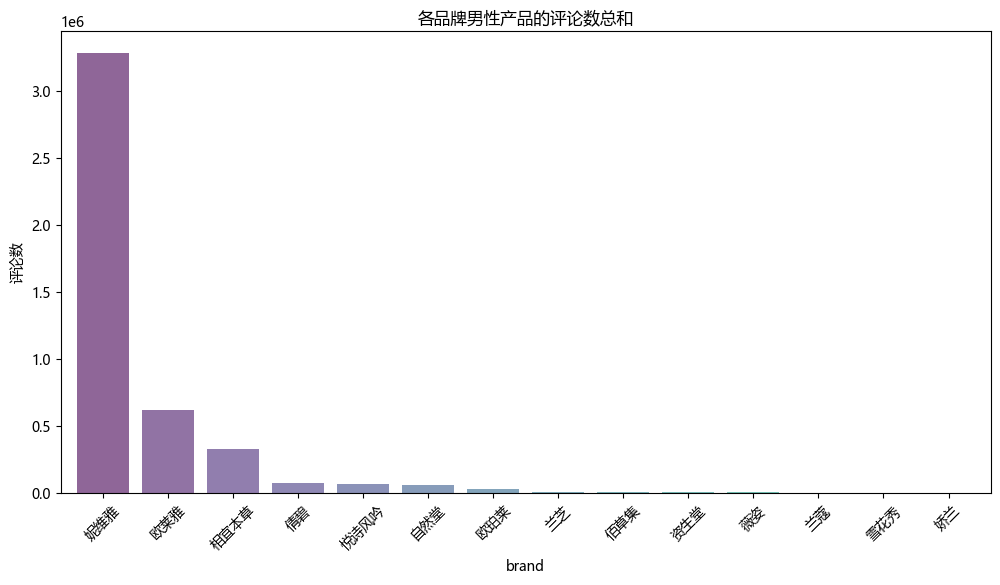

In [59]:
plt.figure(figsize = (12,6))
brandman_pop.plot(kind = 'bar', width = 0.8,alpha = 0.6,color = get_colors(brands))

plt.xticks(rotation = 45)
plt.title('各品牌男性产品的评论数总和')
plt.ylabel('评论数')
plt.show()

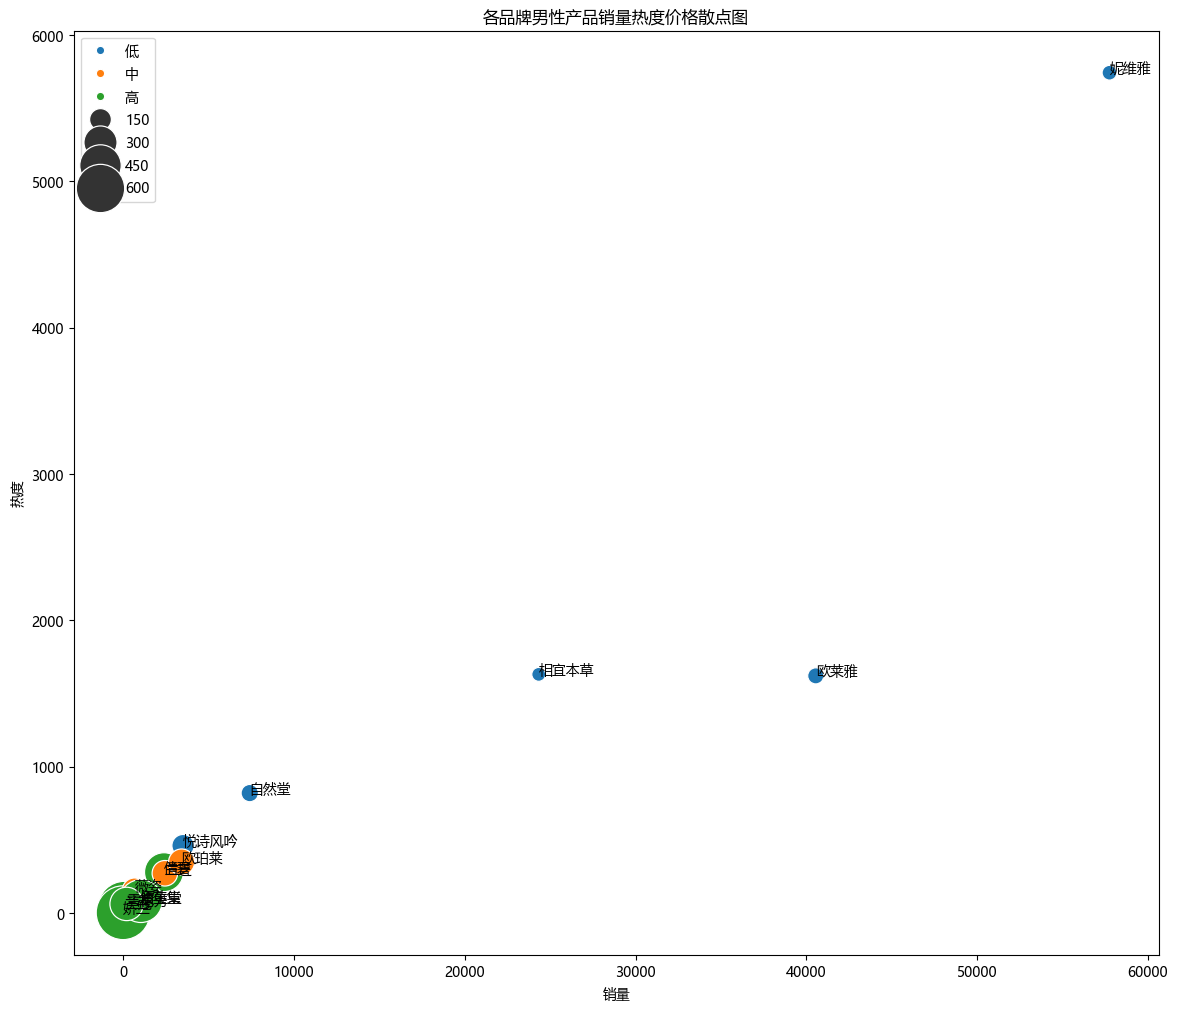

In [61]:
# 热度、销量、价格散点图
x = round(man.groupby('brand')['sale_count'].agg('mean'),2)
y = round(man.groupby('brand')['comment_count'].agg('mean'),2) # 各品牌评论数均值
s = round(man.groupby('brand')['price'].agg('mean') ,2) #各品牌价格均值
txt = man.groupby('brand').size().index

man_price_categories = pd.cut(s,bins = [0,s.quantile(0.33),s.quantile(0.67),s.max()],labels = ['低','中','高'])

plt.figure(figsize = (14,12))

sns.scatterplot(x = x, y=y,size = s, hue = man_price_categories, sizes = (100,1500))

for i in range(len(txt)):
    plt.annotate(txt[i],xy =(x.iloc[i],y.iloc[i]))
    
plt.ylabel('热度')
plt.xlabel('销量')
plt.title('各品牌男性产品销量热度价格散点图')
plt.legend(loc = 'upper left')
plt.show()

### 2.7.5 男性产品价格分析

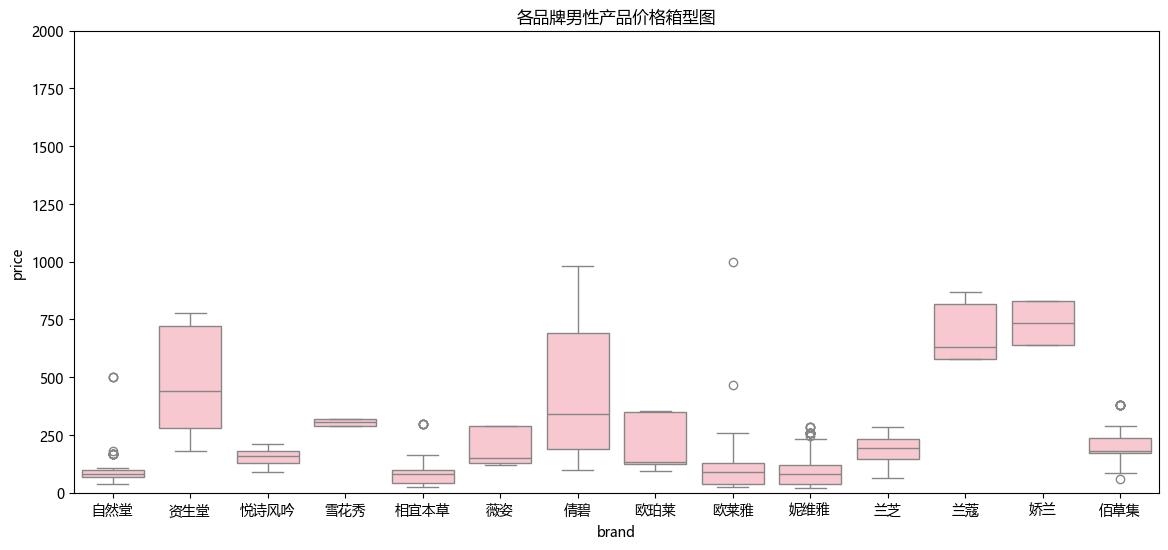

In [62]:
plt.figure(figsize = (14,6))
sns.boxplot(x = 'brand', y = 'price', data = man, color = 'pink')
plt.ylim(0,2000)
plt.title('各品牌男性产品价格箱型图')
plt.show()

In [63]:
avg_manprice = round(man.groupby('brand')['price'].mean(),2)
avg_manprice

brand
佰草集     209.48
倩碧      401.62
兰芝      193.25
兰蔻      699.71
妮维雅      88.17
娇兰      735.00
悦诗风吟    155.57
欧珀莱     199.64
欧莱雅      98.42
相宜本草     82.15
自然堂     108.15
薇姿      178.73
资生堂     479.87
雪花秀     305.00
Name: price, dtype: float64

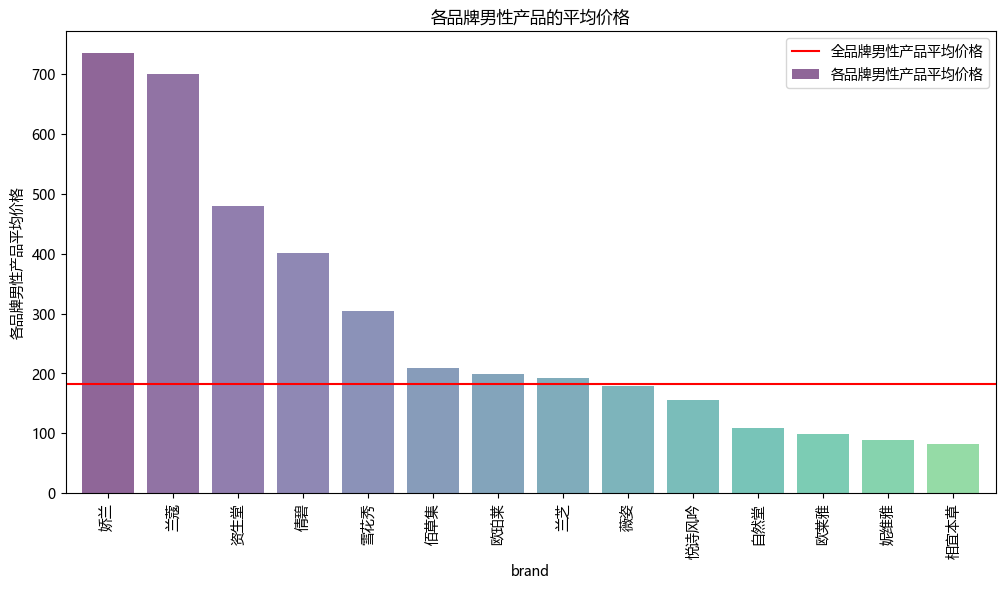

In [64]:
fig = plt.figure(figsize = (12,6))
avg_manprice.sort_values(ascending = False).plot(kind = 'bar', width = 0.8,alpha = 0.6, color = get_colors(brands),label = '各品牌男性产品平均价格')
y = man['price'].mean()
plt.axhline(y,0,5,color = 'r', label = '全品牌男性产品平均价格')
plt.ylabel('各品牌男性产品平均价格')
plt.title('各品牌男性产品的平均价格',fontsize = 12)
plt.legend(loc = 'upper right')
plt.show()